In [984]:
from datascience import *
import matplotlib
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import plotly

plt.style.use('ggplot')


In [731]:
# loads table 1 from excel sheet
tb1 = pd.read_excel('/Users/aryan/Documents/INF1340H Programming For DataScience/UN_MigrantStockTotal_2015.xlsx', 
                    sheet_name="Table 1")
tb1.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3           Unnamed: 4 Unnamed: 5  \
0        NaN        NaN        NaN        NaN                  NaN        NaN   
1        NaN        NaN        NaN        NaN                  NaN        NaN   
2        NaN        NaN        NaN        NaN                  NaN        NaN   
3        NaN        NaN        NaN        NaN       United Nations        NaN   
4        NaN        NaN        NaN        NaN  Population Division        NaN   

  Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9  ...  Unnamed: 33 Unnamed: 34  \
0        NaN        NaN        NaN         NaN  ...          NaN         NaN   
1        NaN        NaN        NaN         NaN  ...          NaN         NaN   
2        NaN        NaN        NaN         NaN  ...          NaN         NaN   
3        NaN        NaN        NaN         NaN  ...          NaN         NaN   
4        NaN        NaN        NaN         NaN  ...          NaN         NaN   

  Unnamed: 35 Unnamed: 36 Unnamed: 37  Unnamed: 38  Unnamed: 39 Unnamed: 40  \
0         NaN         NaN         NaN          NaN          NaN         NaN   
1         NaN         NaN         NaN          NaN          NaN         NaN   
2         NaN         NaN         NaN          NaN          NaN         NaN   
3         NaN         NaN         NaN          NaN          NaN         NaN   
4         NaN         NaN         NaN          NaN          NaN         NaN   

  Unnamed: 41 Unnamed: 42  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 43 columns]

In [732]:
# removed unwanted rows and columns
tb1 = tb1.iloc[13: , 1:23]

tb1.head()

Unnamed: 1 Unnamed: 2  \
13  Major area, region, country or area of destina...      Notes   
14                                                NaN        NaN   
15                                              WORLD        NaN   
16                                  Developed regions        (b)   
17                                 Developing regions        (c)   

      Unnamed: 3        Unnamed: 4  \
13  Country code  Type of data (a)   
14           NaN               NaN   
15           900               NaN   
16           901               NaN   
17           902               NaN   

                                           Unnamed: 5 Unnamed: 6 Unnamed: 7  \
13  International migrant stock at mid-year (both ...        NaN        NaN   
14                                               1990       1995       2000   
15                                          152563212  160801752  172703309   
16                                           82378628   92306854  103375363   
17                                           70184584   68494898   69327946   

   Unnamed: 8   Unnamed: 9  Unnamed: 10  ... Unnamed: 13 Unnamed: 14  \
13        NaN          NaN          NaN  ...         NaN         NaN   
14       2005       2010.0       2015.0  ...        2000        2005   
15  191269100  221714243.0  243700236.0  ...    87884839    97866674   
16  117181109  132560325.0  140481955.0  ...    50536796    57217777   
17   74087991   89153918.0  103218281.0  ...    37348043    40648897   

    Unnamed: 15  Unnamed: 16  \
13          NaN          NaN   
14       2010.0       2015.0   
15  114613714.0  126115435.0   
16   64081077.0   67618619.0   
17   50532637.0   58496816.0   

                                         Unnamed: 17  Unnamed: 18 Unnamed: 19  \
13  International migrant stock at mid-year (female)          NaN         NaN   
14                                              1990         1995        2000   
15                                          74815702     79064275    84818470   
16                                          42115231     47214055    52838567   
17                                          32700471     31850220    31979903   

   Unnamed: 20  Unnamed: 21  Unnamed: 22  
13         NaN          NaN          NaN  
14        2005       2010.0       2015.0  
15    93402426  107100529.0  117584801.0  
16    59963332   68479248.0   72863336.0  
17    33439094   38621281.0   44721465.0  

[5 rows x 22 columns]

In [733]:
# change headers 
tb1.columns = tb1.iloc[0] 
tb1 = tb1[1:]

tb1.head()

13 Major area, region, country or area of destination Notes Country code  \
14                                                NaN   NaN          NaN   
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   

13 Type of data (a) International migrant stock at mid-year (both sexes)  \
14              NaN                                               1990     
15              NaN                                          152563212     
16              NaN                                           82378628     
17              NaN                                           70184584     
18              NaN                                           11075966     

13        NaN        NaN        NaN          NaN          NaN  ...       NaN  \
14       1995       2000       2005       2010.0       2015.0  ...      2000   
15  160801752  172703309  191269100  221714243.0  243700236.0  ...  87884839   
16   92306854  103375363  117181109  132560325.0  140481955.0  ...  50536796   
17   68494898   69327946   74087991   89153918.0  103218281.0  ...  37348043   
18   11711703   10077824    9809634   10018128.0   11951316.0  ...   5361902   

13       NaN          NaN          NaN  \
14      2005       2010.0       2015.0   
15  97866674  114613714.0  126115435.0   
16  57217777   64081077.0   67618619.0   
17  40648897   50532637.0   58496816.0   
18   5383009    5462714.0    6463217.0   

13  International migrant stock at mid-year (female)       NaN       NaN  \
14                                              1990      1995      2000   
15                                          74815702  79064275  84818470   
16                                          42115231  47214055  52838567   
17                                          32700471  31850220  31979903   
18                                           5236216   5573685   4721920   

13       NaN          NaN          NaN  
14      2005       2010.0       2015.0  
15  93402426  107100529.0  117584801.0  
16  59963332   68479248.0   72863336.0  
17  33439094   38621281.0   44721465.0  
18   4432371    4560536.0    5493028.0  

[5 rows x 22 columns]

In [734]:
# Reset index
tb1 = tb1.reset_index(drop=True)
# Remove unnecessary columns for further cleaning
tb1 = tb1.drop(["Notes", "Country code", "Type of data (a)"], axis =1)
tb1.head()

13 Major area, region, country or area of destination  \
0                                                 NaN   
1                                               WORLD   
2                                   Developed regions   
3                                  Developing regions   
4                           Least developed countries   

13 International migrant stock at mid-year (both sexes)        NaN        NaN  \
0                                                1990         1995       2000   
1                                           152563212    160801752  172703309   
2                                            82378628     92306854  103375363   
3                                            70184584     68494898   69327946   
4                                            11075966     11711703   10077824   

13        NaN          NaN          NaN  \
0        2005       2010.0       2015.0   
1   191269100  221714243.0  243700236.0   
2   117181109  132560325.0  140481955.0   
3    74087991   89153918.0  103218281.0   
4     9809634   10018128.0   11951316.0   

13 International migrant stock at mid-year (male)       NaN       NaN  \
0                                            1990      1995      2000   
1                                        77747510  81737477  87884839   
2                                        40263397  45092799  50536796   
3                                        37484113  36644678  37348043   
4                                         5843107   6142712   5361902   

13       NaN          NaN          NaN  \
0       2005       2010.0       2015.0   
1   97866674  114613714.0  126115435.0   
2   57217777   64081077.0   67618619.0   
3   40648897   50532637.0   58496816.0   
4    5383009    5462714.0    6463217.0   

13 International migrant stock at mid-year (female)       NaN       NaN  \
0                                              1990      1995      2000   
1                                          74815702  79064275  84818470   
2                                          42115231  47214055  52838567   
3                                          32700471  31850220  31979903   
4                                           5236216   5573685   4721920   

13       NaN          NaN          NaN  
0       2005       2010.0       2015.0  
1   93402426  107100529.0  117584801.0  
2   59963332   68479248.0   72863336.0  
3   33439094   38621281.0   44721465.0  
4    4432371    4560536.0    5493028.0

In [735]:
# Create a copy of table 1 dataframe
table1 = tb1

# New column Names for dataframe after creating a copy of dataframe
table1.columns = ['Region','Both Sexes','Both Sexes','Both Sexes','Both Sexes','Both Sexes','Both Sexes',
                  'Male','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Female',]
table1.head()

Region  Both Sexes  Both Sexes  Both Sexes  Both Sexes  \
0                        NaN        1990        1995        2000        2005   
1                      WORLD   152563212   160801752   172703309   191269100   
2          Developed regions    82378628    92306854   103375363   117181109   
3         Developing regions    70184584    68494898    69327946    74087991   
4  Least developed countries    11075966    11711703    10077824     9809634   

    Both Sexes   Both Sexes      Male      Male      Male      Male  \
0       2010.0       2015.0      1990      1995      2000      2005   
1  221714243.0  243700236.0  77747510  81737477  87884839  97866674   
2  132560325.0  140481955.0  40263397  45092799  50536796  57217777   
3   89153918.0  103218281.0  37484113  36644678  37348043  40648897   
4   10018128.0   11951316.0   5843107   6142712   5361902   5383009   

          Male         Male    Female    Female    Female    Female  \
0       2010.0       2015.0      1990      1995      2000      2005   
1  114613714.0  126115435.0  74815702  79064275  84818470  93402426   
2   64081077.0   67618619.0  42115231  47214055  52838567  59963332   
3   50532637.0   58496816.0  32700471  31850220  31979903  33439094   
4    5462714.0    6463217.0   5236216   5573685   4721920   4432371   

        Female       Female  
0       2010.0       2015.0  
1  107100529.0  117584801.0  
2   68479248.0   72863336.0  
3   38621281.0   44721465.0  
4    4560536.0    5493028.0

In [736]:
# Check for null in region other then first row

table1['Region'].isnull().values.any() #Gives true
table1['Region'].isnull().sum() #Only shows 1 null

# Rename null with Region on first row
table1['Region'] = table1['Region'].fillna('Region')

table1.head()

Region  Both Sexes  Both Sexes  Both Sexes  Both Sexes  \
0                     Region        1990        1995        2000        2005   
1                      WORLD   152563212   160801752   172703309   191269100   
2          Developed regions    82378628    92306854   103375363   117181109   
3         Developing regions    70184584    68494898    69327946    74087991   
4  Least developed countries    11075966    11711703    10077824     9809634   

    Both Sexes   Both Sexes      Male      Male      Male      Male  \
0       2010.0       2015.0      1990      1995      2000      2005   
1  221714243.0  243700236.0  77747510  81737477  87884839  97866674   
2  132560325.0  140481955.0  40263397  45092799  50536796  57217777   
3   89153918.0  103218281.0  37484113  36644678  37348043  40648897   
4   10018128.0   11951316.0   5843107   6142712   5361902   5383009   

          Male         Male    Female    Female    Female    Female  \
0       2010.0       2015.0      1990      1995      2000      2005   
1  114613714.0  126115435.0  74815702  79064275  84818470  93402426   
2   64081077.0   67618619.0  42115231  47214055  52838567  59963332   
3   50532637.0   58496816.0  32700471  31850220  31979903  33439094   
4    5462714.0    6463217.0   5236216   5573685   4721920   4432371   

        Female       Female  
0       2010.0       2015.0  
1  107100529.0  117584801.0  
2   68479248.0   72863336.0  
3   38621281.0   44721465.0  
4    4560536.0    5493028.0

In [737]:
# Create New table that just includes Region and Both Sexes
tb1_BothSexes = table1[['Region','Both Sexes']]


# change headers to first row 
tb1_BothSexes.columns = tb1_BothSexes.iloc[0] 
tb1_BothSexes = tb1_BothSexes[1:]

# # Adds New column Gender to the table
tb1_BothSexes['Gender'] = 'Both Sexes'

# to numeric and round
cols = [1990, 1995, 2000, 2005, 2010, 2015]
tb1_BothSexes[cols] = tb1_BothSexes[cols].apply(pd.to_numeric, errors='coerce', axis=1)
tb1_BothSexes[cols] = tb1_BothSexes[cols].apply(np.ceil)


tb1_BothSexes.head()

0                                             Region         1990  \
1                                              WORLD  152563212.0   
2                                  Developed regions   82378628.0   
3                                 Developing regions   70184584.0   
4                          Least developed countries   11075966.0   
5  Less developed regions excluding least develop...   59105261.0   

0         1995         2000         2005       2010.0       2015.0      Gender  
1  160801752.0  172703309.0  191269100.0  221714243.0  243700236.0  Both Sexes  
2   92306854.0  103375363.0  117181109.0  132560325.0  140481955.0  Both Sexes  
3   68494898.0   69327946.0   74087991.0   89153918.0  103218281.0  Both Sexes  
4   11711703.0   10077824.0    9809634.0   10018128.0   11951316.0  Both Sexes  
5   56778501.0   59244124.0   64272611.0   79130668.0   91262036.0  Both Sexes

In [738]:
# Melt Both Sexes table to long form
tb1_BothSexes = tb1_BothSexes.melt(id_vars = ['Region','Gender'], var_name = "Year", 
                                   value_name = "Migrant Stock Mid-Year")

# to numeric and round
cols1 = ['Year']
tb1_BothSexes[cols1] = tb1_BothSexes[cols1].apply(pd.to_numeric, errors='coerce', axis=1)

tb1_BothSexes_melt = tb1_BothSexes

tb1_BothSexes_melt.tail(10)

Region      Gender    Year  Migrant Stock Mid-Year
1580                  Polynesia  Both Sexes  2015.0                 72120.0
1581             American Samoa  Both Sexes  2015.0                 23216.0
1582               Cook Islands  Both Sexes  2015.0                  4152.0
1583           French Polynesia  Both Sexes  2015.0                 30058.0
1584                       Niue  Both Sexes  2015.0                   557.0
1585                      Samoa  Both Sexes  2015.0                  4929.0
1586                    Tokelau  Both Sexes  2015.0                   487.0
1587                      Tonga  Both Sexes  2015.0                  5731.0
1588                     Tuvalu  Both Sexes  2015.0                   141.0
1589  Wallis and Futuna Islands  Both Sexes  2015.0                  2849.0

In [739]:
# Remove .0 from year
tb1_BothSexes['Year'] = tb1_BothSexes['Year'].apply(lambda f: format(f, '.0f'))
tb1_BothSexes['Migrant Stock Mid-Year'] = tb1_BothSexes['Migrant Stock Mid-Year'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb1_BothSexes = tb1_BothSexes.pivot_table(index=['Region','Year'],
                                         columns = 'Gender', aggfunc='first')
tb1_BothSexes.head(10)

Migrant Stock Mid-Year
Gender                       Both Sexes
Region      Year                       
Afghanistan 1990                  57686
            1995                  71522
            2000                  75917
            2005                  87300
            2010                 102246
            2015                 382365
Africa      1990               15690623
            1995               16352814
            2000               14800306
            2005               15191146

In [740]:
# New table that just filters Region and Male's
tb1_Male = table1[['Region','Male']]

# change headers to first row 
tb1_Male.columns = tb1_Male.iloc[0] 
tb1_Male = tb1_Male[1:]

# # Adds New column Gender to the table
tb1_Male['Gender'] = 'Male'

# to numeric and round
cols = [1990, 1995, 2000, 2005, 2010, 2015]
tb1_Male[cols] = tb1_Male[cols].apply(pd.to_numeric, errors='coerce', axis=1)
tb1_Male[cols] = tb1_Male[cols].apply(np.ceil)

tb1_Male.head()

0                                             Region        1990        1995  \
1                                              WORLD  77747510.0  81737477.0   
2                                  Developed regions  40263397.0  45092799.0   
3                                 Developing regions  37484113.0  36644678.0   
4                          Least developed countries   5843107.0   6142712.0   
5  Less developed regions excluding least develop...  31641006.0  30501966.0   

0        2000        2005       2010.0       2015.0 Gender  
1  87884839.0  97866674.0  114613714.0  126115435.0   Male  
2  50536796.0  57217777.0   64081077.0   67618619.0   Male  
3  37348043.0  40648897.0   50532637.0   58496816.0   Male  
4   5361902.0   5383009.0    5462714.0    6463217.0   Male  
5  31986141.0  35265888.0   45069923.0   52033599.0   Male

In [741]:
# Melt table to long form
tb1_Male = tb1_Male.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Stock Mid-Year")

# Remove .0 from year
tb1_Male['Year'] = tb1_Male['Year'].apply(lambda f: format(f, '.0f'))
tb1_Male['Migrant Stock Mid-Year'] = tb1_Male['Migrant Stock Mid-Year'].apply(lambda f: format(f, '.0f'))

tb1_Male = tb1_Male.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')


tb1_Male.head(10)

Migrant Stock Mid-Year
Gender                             Male
Region      Year                       
Afghanistan 1990                  32558
            1995                  39105
            2000                  42848
            2005                  49274
            2010                  57709
            2015                 193445
Africa      1990                8279564
            1995                8616931
            2000                7856358
            2005                8231437

In [742]:
# New table that just filters Region and Female's
tb1_Female = table1[['Region','Female']]

# change headers to first row 
tb1_Female.columns = tb1_Female.iloc[0] 
tb1_Female = tb1_Female[1:]

# # Adds New column Gender to the table
tb1_Female['Gender'] = 'Female'

# to numeric and round
cols = [1990, 1995, 2000, 2005, 2010, 2015]
tb1_Female[cols] = tb1_Female[cols].apply(pd.to_numeric, errors='coerce', axis=1)
tb1_Female[cols] = tb1_Female[cols].apply(np.ceil)


tb1_Female.head()

0                                             Region        1990        1995  \
1                                              WORLD  74815702.0  79064275.0   
2                                  Developed regions  42115231.0  47214055.0   
3                                 Developing regions  32700471.0  31850220.0   
4                          Least developed countries   5236216.0   5573685.0   
5  Less developed regions excluding least develop...  27464255.0  26276535.0   

0        2000        2005       2010.0       2015.0  Gender  
1  84818470.0  93402426.0  107100529.0  117584801.0  Female  
2  52838567.0  59963332.0   68479248.0   72863336.0  Female  
3  31979903.0  33439094.0   38621281.0   44721465.0  Female  
4   4721920.0   4432371.0    4560536.0    5493028.0  Female  
5  27257983.0  29006723.0   34060745.0   39228437.0  Female

In [743]:
# Melt table to long form long structure
tb1_Female = tb1_Female.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Stock Mid-Year")

# Remove .0 from year
tb1_Female['Year'] = tb1_Female['Year'].apply(lambda f: format(f, '.0f'))
tb1_Female['Migrant Stock Mid-Year'] = tb1_Female['Migrant Stock Mid-Year'].apply(lambda f: format(f, '.0f'))

# Pivot to further arrange by Gender
tb1_Female = tb1_Female.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')


tb1_Female.head()

Migrant Stock Mid-Year
Gender                           Female
Region      Year                       
Afghanistan 1990                  25128
            1995                  32417
            2000                  33069
            2005                  38026
            2010                  44537

In [744]:
# Table 1 final cleaned
# List to meger all dataframes 
my_list = [tb1_BothSexes,tb1_Male,tb1_Female]

# merge the dataframes by using pd.concat() function
tidy_t1 = pd.concat(my_list, axis = 1)


tidy_t1.head(20)

Migrant Stock Mid-Year                   
Gender                       Both Sexes      Male   Female
Region      Year                                          
Afghanistan 1990                  57686     32558    25128
            1995                  71522     39105    32417
            2000                  75917     42848    33069
            2005                  87300     49274    38026
            2010                 102246     57709    44537
            2015                 382365    193445   188920
Africa      1990               15690623   8279564  7411059
            1995               16352814   8616931  7735883
            2000               14800306   7856358  6943948
            2005               15191146   8231437  6959709
            2010               16840014   9039314  7800700
            2015               20649557  11123423  9526134
Albania     1990                  66013     30579    35434
            1995                  71354     33284    38070
            2000                  76695     35990    40705
            2005                  64739     32993    31746
            2010                  52784     26901    25883
            2015                  57616     29363    28253
Algeria     1990                 273954    150234   123720
            1995                 262032    143696   118336

In [745]:
# Similarly now need to clean table 2
# load table 2 in dataframe
tb2 = pd.read_excel('/Users/aryan/Documents/INF1340H Programming For DataScience/UN_MigrantStockTotal_2015.xlsx', sheet_name="Table 2")
tb2.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3           Unnamed: 4  \
0        NaN        NaN        NaN        NaN                  NaN   
1        NaN        NaN        NaN        NaN                  NaN   
2        NaN        NaN        NaN        NaN                  NaN   
3        NaN        NaN        NaN        NaN       United Nations   
4        NaN        NaN        NaN        NaN  Population Division   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  

[5 rows x 22 columns]

In [746]:
# removed unwanted rows and columns
tb2 = tb2.iloc[13: , 1:22]

# change headers 
tb2.columns = tb2.iloc[0] 
tb2 = tb2[1:]

# Reset index
tb2 = tb2.reset_index(drop=True)

# Remove unnecessary columns for further cleaning
tb2 = tb2.drop(["Notes", "Country code"], axis =1)

tb2.head()


13 Major area, region, country or area of destination  \
0                                                 NaN   
1                                               WORLD   
2                                   Developed regions   
3                                  Developing regions   
4                           Least developed countries   

13 Total population of both sexes at mid-year (thousands)          NaN  \
0                                                1990         1995.000   
1                                         5309667.699      5735123.084   
2                                         1144463.062      1169761.211   
3                                         4165204.637      4565361.873   
4                                          510057.629       585189.354   

13          NaN          NaN          NaN          NaN  \
0      2000.000     2005.000     2010.000     2015.000   
1   6126622.121  6519635.850  6929725.043  7349472.099   
2   1188811.731  1208919.509  1233375.711  1251351.086   
3   4937810.390  5310716.341  5696349.332  6098121.013   
4    664386.087   752804.951   847254.847   954157.804   

13 Total male population at mid-year (thousands)          NaN          NaN  \
0                                           1990         1995         2000   
1                                    2670423.701  2886635.893  3084537.662   
2                                     555255.626   568268.456   578010.218   
3                                    2115168.075  2318367.437  2506527.444   
4                                     254042.556   292026.742   331482.475   

13          NaN          NaN          NaN  \
0          2005         2010         2015   
1   3285082.249  3493956.904  3707205.753   
2    587962.213   599955.476   609297.148   
3   2697120.036  2894001.428  3097908.605   
4    375757.715   422397.532   476031.179   

13 Total female population at mid-year (thousands)          NaN          NaN  \
0                                             1990         1995         2000   
1                                      2639243.998  2848487.191  3042084.459   
2                                       589207.436   601492.755   610801.513   
3                                      2050036.562  2246994.436  2431282.946   
4                                       256015.073   293162.612   332903.612   

13          NaN          NaN          NaN  
0          2005         2010         2015  
1   3234553.601  3435768.139  3642266.346  
2    620957.296   633420.235   642053.938  
3   2613596.305  2802347.904  3000212.408  
4    377047.236   424857.315   478126.625

In [747]:
# Create a copy of table 1 dataframe
table2 = tb2

# New column Names for dataframe after creating a copy of dataframe
table2.columns = ['Region','Both Sexes','Both Sexes','Both Sexes','Both Sexes','Both Sexes','Both Sexes',
                  'Male','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Female',]

# Rename null with Region on first row
table2['Region'] = table2['Region'].fillna('Region')

table2.head()

Region   Both Sexes   Both Sexes   Both Sexes  \
0                     Region         1990     1995.000     2000.000   
1                      WORLD  5309667.699  5735123.084  6126622.121   
2          Developed regions  1144463.062  1169761.211  1188811.731   
3         Developing regions  4165204.637  4565361.873  4937810.390   
4  Least developed countries   510057.629   585189.354   664386.087   

    Both Sexes   Both Sexes   Both Sexes         Male         Male  \
0     2005.000     2010.000     2015.000         1990         1995   
1  6519635.850  6929725.043  7349472.099  2670423.701  2886635.893   
2  1208919.509  1233375.711  1251351.086   555255.626   568268.456   
3  5310716.341  5696349.332  6098121.013  2115168.075  2318367.437   
4   752804.951   847254.847   954157.804   254042.556   292026.742   

          Male         Male         Male         Male       Female  \
0         2000         2005         2010         2015         1990   
1  3084537.662  3285082.249  3493956.904  3707205.753  2639243.998   
2   578010.218   587962.213   599955.476   609297.148   589207.436   
3  2506527.444  2697120.036  2894001.428  3097908.605  2050036.562   
4   331482.475   375757.715   422397.532   476031.179   256015.073   

        Female       Female       Female       Female       Female  
0         1995         2000         2005         2010         2015  
1  2848487.191  3042084.459  3234553.601  3435768.139  3642266.346  
2   601492.755   610801.513   620957.296   633420.235   642053.938  
3  2246994.436  2431282.946  2613596.305  2802347.904  3000212.408  
4   293162.612   332903.612   377047.236   424857.315   478126.625

In [748]:
# Create New table that just includes Region and Both Sexes
tb2_BothSexes = tb2[['Region','Both Sexes']]


# change headers to first row 
tb2_BothSexes.columns = tb2_BothSexes.iloc[0] 
tb2_BothSexes = tb2_BothSexes[1:]

# # Adds New column Gender to the table
tb2_BothSexes['Gender'] = 'Both Sexes'

# to numeric and round
cols = [1990, 1995, 2000, 2005, 2010, 2015]
tb2_BothSexes[cols] = tb2_BothSexes[cols].apply(pd.to_numeric, errors='coerce', axis=1)
tb2_BothSexes[cols] = tb2_BothSexes[cols].apply(np.ceil)


tb2_BothSexes.head()

0                                             Region       1990     1995.0  \
1                                              WORLD  5309668.0  5735124.0   
2                                  Developed regions  1144464.0  1169762.0   
3                                 Developing regions  4165205.0  4565362.0   
4                          Least developed countries   510058.0   585190.0   
5  Less developed regions excluding least develop...  3655148.0  3980173.0   

0     2000.0     2005.0     2010.0     2015.0      Gender  
1  6126623.0  6519636.0  6929726.0  7349473.0  Both Sexes  
2  1188812.0  1208920.0  1233376.0  1251352.0  Both Sexes  
3  4937811.0  5310717.0  5696350.0  6098122.0  Both Sexes  
4   664387.0   752805.0   847255.0   954158.0  Both Sexes  
5  4273425.0  4557912.0  4849095.0  5143964.0  Both Sexes

In [749]:
# Melt Both Sexes table to long form
tb2_BothSexes = tb2_BothSexes.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Population Mid-Year")

# Remove .0 from year
tb2_BothSexes['Year'] = tb2_BothSexes['Year'].apply(lambda f: format(f, '.0f'))
tb2_BothSexes['Population Mid-Year'] = tb2_BothSexes['Population Mid-Year'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb2_BothSexes = tb2_BothSexes.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb2_BothSexes.head(10)

Population Mid-Year
Gender                    Both Sexes
Region      Year                    
Afghanistan 1990               12068
            1995               16773
            2000               19702
            2005               24400
            2010               27963
            2015               32527
Africa      1990              631615
            1995              720417
            2000              814064
            2005              920239

In [750]:
# New table that just filters Region and Male's
tb2_Male = tb2[['Region','Male']]

# change headers to first row 
tb2_Male.columns = tb2_Male.iloc[0] 
tb2_Male = tb2_Male[1:]

# # Adds New column Gender to the table
tb2_Male['Gender'] = 'Male'

# to numeric and round
cols = [1990, 1995, 2000, 2005, 2010, 2015]
tb2_Male[cols] = tb2_Male[cols].apply(pd.to_numeric, errors='coerce', axis=1)
tb2_Male[cols] = tb2_Male[cols].apply(np.ceil)

tb2_Male.head()

0                                             Region       1990       1995  \
1                                              WORLD  2670424.0  2886636.0   
2                                  Developed regions   555256.0   568269.0   
3                                 Developing regions  2115169.0  2318368.0   
4                          Least developed countries   254043.0   292027.0   
5  Less developed regions excluding least develop...  1861126.0  2026341.0   

0       2000       2005       2010       2015 Gender  
1  3084538.0  3285083.0  3493957.0  3707206.0   Male  
2   578011.0   587963.0   599956.0   609298.0   Male  
3  2506528.0  2697121.0  2894002.0  3097909.0   Male  
4   331483.0   375758.0   422398.0   476032.0   Male  
5  2175045.0  2321363.0  2471604.0  2621878.0   Male

In [751]:
# Melt table to long form
tb2_Male = tb2_Male.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Population Mid-Year")

# Remove .0 from year and .00 from population
tb2_Male['Year'] = tb2_Male['Year'].apply(lambda f: format(f, '.0f'))
tb2_Male['Population Mid-Year'] = tb2_Male['Population Mid-Year'].apply(lambda f: format(f, '.0f'))

# pivot to create gender column
tb2_Male = tb2_Male.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')


tb2_Male.head(10)

Population Mid-Year
Gender                          Male
Region      Year                    
Afghanistan 1990                6180
            1995                8683
            2000               10147
            2005               12617
            2010               14368
            2015               16774
Africa      1990              315072
            1995              359409
            2000              406406
            2005              459591

In [752]:
# New table that just filters Region and Female's
tb2_Female = tb2[['Region','Female']]

# change headers to first row 
tb2_Female.columns = tb2_Female.iloc[0] 
tb2_Female = tb2_Female[1:]

# # Adds New column Gender to the table
tb2_Female['Gender'] = 'Female'

# to numeric and round
cols = [1990, 1995, 2000, 2005, 2010, 2015]
tb2_Female[cols] = tb2_Female[cols].apply(pd.to_numeric, errors='coerce', axis=1)
tb2_Female[cols] = tb2_Female[cols].apply(np.ceil)

tb2_Female.head()

0                                             Region       1990       1995  \
1                                              WORLD  2639244.0  2848488.0   
2                                  Developed regions   589208.0   601493.0   
3                                 Developing regions  2050037.0  2246995.0   
4                          Least developed countries   256016.0   293163.0   
5  Less developed regions excluding least develop...  1794022.0  1953832.0   

0       2000       2005       2010       2015  Gender  
1  3042085.0  3234554.0  3435769.0  3642267.0  Female  
2   610802.0   620958.0   633421.0   642054.0  Female  
3  2431283.0  2613597.0  2802348.0  3000213.0  Female  
4   332904.0   377048.0   424858.0   478127.0  Female  
5  2098380.0  2236550.0  2377491.0  2522086.0  Female

In [753]:
# Melt table to long form
tb2_Female = tb2_Female.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Population Mid-Year")

# Remove .0 from year and .00 from population
tb2_Female['Year'] = tb2_Female['Year'].apply(lambda f: format(f, '.0f'))
tb2_Female['Population Mid-Year'] = tb2_Female['Population Mid-Year'].apply(lambda f: format(f, '.0f'))

# pivot to create gender column
tb2_Female = tb2_Female.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb2_Female.head(10)

Population Mid-Year
Gender                        Female
Region      Year                    
Afghanistan 1990                5888
            1995                8091
            2000                9556
            2005               11784
            2010               13595
            2015               15753
Africa      1990              316543
            1995              361008
            2000              407658
            2005              460649

In [754]:
# Table 2 final cleaned
# List to meger all dataframes 
my_list = [tb2_BothSexes,tb2_Male,tb2_Female]

# merge the dataframes by using pd.concat() function
tidy_t2 = pd.concat(my_list, axis = 1)


tidy_t2.head(20)

Population Mid-Year                
Gender                    Both Sexes    Male  Female
Region      Year                                    
Afghanistan 1990               12068    6180    5888
            1995               16773    8683    8091
            2000               19702   10147    9556
            2005               24400   12617   11784
            2010               27963   14368   13595
            2015               32527   16774   15753
Africa      1990              631615  315072  316543
            1995              720417  359409  361008
            2000              814064  406406  407658
            2005              920239  459591  460649
            2010             1044107  521740  522368
            2015             1186179  593455  592724
Albania     1990                3282    1681    1601
            1995                3107    1530    1578
            2000                3122    1578    1545
            2005                3083    1549    1534
            2010                2902    1463    1440
            2015                2897    1437    1460
Algeria     1990               25913   13118   12796
            1995               28905   14640   14265

In [755]:
# Similarly now need to clean table 3
# load table 3 in dataframe
tb3 = pd.read_excel('/Users/aryan/Documents/INF1340H Programming For DataScience/UN_MigrantStockTotal_2015.xlsx', sheet_name="Table 3")

In [756]:
# removed unwanted rows and columns
tb3 = tb3.iloc[13: , 1:23]

# change headers 
tb3.columns = tb3.iloc[0] 
tb3 = tb3[1:]

# Reset index
tb3 = tb3.reset_index(drop=True)

# Remove unnecessary columns for further cleaning
tb3 = tb3.drop(["Notes", "Country code","Type of data (a)"], axis =1)

tb3.head()


13 Major area, region, country or area of destination  \
0                                                 NaN   
1                                               WORLD   
2                                   Developed regions   
3                                  Developing regions   
4                           Least developed countries   

13 International migrant stock as a percentage of the total population (both sexes)  \
0                                                1990                                 
1                                             2.87331                                 
2                                            7.198015                                 
3                                            1.685021                                 
4                                            2.171513                                 

13       NaN       NaN       NaN          NaN          NaN  \
0       1995      2000      2005  2010.000000  2015.000000   
1   2.803806  2.818899  2.933739     3.199467     3.315888   
2   7.891085  8.695688  9.693045    10.747765    11.226422   
3   1.500317  1.404022  1.395066     1.565106     1.692624   
4   2.001353  1.516863  1.303078     1.182422     1.252551   

13 International migrant stock as a percentage of the total population (male)  \
0                                                1990                           
1                                             2.91143                           
2                                            7.251326                           
3                                            1.772158                           
4                                             2.30005                           

13       NaN       NaN       NaN        NaN        NaN  \
0       1995      2000      2005       2010       2015   
1   2.831583  2.849206  2.979124   3.280341     3.4019   
2   7.935123  8.743236   9.73154  10.680972  11.097807   
3   1.580624  1.490031  1.507122   1.746117   1.888268   
4   2.103476  1.617552  1.432574   1.293264    1.35773   

13 International migrant stock as a percentage of the total population (female)  \
0                                                1990                             
1                                             2.83474                             
2                                            7.147777                             
3                                            1.595116                             
4                                            2.045276                             

13       NaN       NaN       NaN        NaN        NaN  
0       1995      2000      2005       2010       2015  
1   2.775658  2.788169  2.887645   3.117222   3.228342  
2    7.84948  8.650694  9.656595  10.811029  11.348476  
3   1.417459  1.315351  1.279428   1.378176    1.49061  
4   1.901226  1.418405  1.175548   1.073428   1.148865

In [757]:
# Create a copy of table 1 dataframe
table3 = tb3

# New column Names for dataframe after creating a copy of dataframe
table3.columns = ['Region','Both Sexes','Both Sexes','Both Sexes','Both Sexes','Both Sexes','Both Sexes',
                  'Male','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Female',]

# Rename null with Region on first row
table3['Region'] = table3['Region'].fillna('Region')

table2.head()

Region   Both Sexes   Both Sexes   Both Sexes  \
0                     Region         1990     1995.000     2000.000   
1                      WORLD  5309667.699  5735123.084  6126622.121   
2          Developed regions  1144463.062  1169761.211  1188811.731   
3         Developing regions  4165204.637  4565361.873  4937810.390   
4  Least developed countries   510057.629   585189.354   664386.087   

    Both Sexes   Both Sexes   Both Sexes         Male         Male  \
0     2005.000     2010.000     2015.000         1990         1995   
1  6519635.850  6929725.043  7349472.099  2670423.701  2886635.893   
2  1208919.509  1233375.711  1251351.086   555255.626   568268.456   
3  5310716.341  5696349.332  6098121.013  2115168.075  2318367.437   
4   752804.951   847254.847   954157.804   254042.556   292026.742   

          Male         Male         Male         Male       Female  \
0         2000         2005         2010         2015         1990   
1  3084537.662  3285082.249  3493956.904  3707205.753  2639243.998   
2   578010.218   587962.213   599955.476   609297.148   589207.436   
3  2506527.444  2697120.036  2894001.428  3097908.605  2050036.562   
4   331482.475   375757.715   422397.532   476031.179   256015.073   

        Female       Female       Female       Female       Female  
0         1995         2000         2005         2010         2015  
1  2848487.191  3042084.459  3234553.601  3435768.139  3642266.346  
2   601492.755   610801.513   620957.296   633420.235   642053.938  
3  2246994.436  2431282.946  2613596.305  2802347.904  3000212.408  
4   293162.612   332903.612   377047.236   424857.315   478126.625

In [958]:
# Create New table that just includes Region and Both Sexes
tb3_BothSexes = tb3[['Region','Both Sexes']]


# change headers to first row 
tb3_BothSexes.columns = tb3_BothSexes.iloc[0] 
tb3_BothSexes = tb3_BothSexes[1:]

# # Adds New column Gender to the table
tb3_BothSexes['Gender'] = 'Both Sexes'



tb3_BothSexes_melt = tb3_BothSexes

tb3_BothSexes.head()

0                                             Region      1990      1995  \
1                                              WORLD   2.87331  2.803806   
2                                  Developed regions  7.198015  7.891085   
3                                 Developing regions  1.685021  1.500317   
4                          Least developed countries  2.171513  2.001353   
5  Less developed regions excluding least develop...  1.617042  1.426534   

0      2000      2005     2010.0     2015.0      Gender  
1  2.818899  2.933739   3.199467   3.315888  Both Sexes  
2  8.695688  9.693045  10.747765  11.226422  Both Sexes  
3  1.404022  1.395066   1.565106   1.692624  Both Sexes  
4  1.516863  1.303078   1.182422   1.252551  Both Sexes  
5  1.386338  1.410133   1.631865   1.774158  Both Sexes

In [759]:
# Melt Both Sexes table to long form
tb3_BothSexes = tb3_BothSexes.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Stock Percentage")

# Remove .0 from year
tb3_BothSexes['Year'] = tb3_BothSexes['Year'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb3_BothSexes = tb3_BothSexes.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb3_BothSexes.head(10)

Migrant Stock Percentage
Gender                         Both Sexes
Region      Year                         
Afghanistan 1990                 0.478025
            1995                 0.426424
            2000                 0.385328
            2005                 0.357788
            2010                 0.365658
            2015                 1.175547
Africa      1990                  2.48421
            1995                 2.269911
            2000                 1.818078
            2005                 1.650783

In [760]:
# Create New table that just includes Region and Both Sexes
tb3_Male = tb3[['Region','Both Sexes']]


# change headers to first row 
tb3_Male.columns = tb3_Male.iloc[0] 
tb3_Male = tb3_Male[1:]

# # Adds New column Gender to the table
tb3_Male['Gender'] = 'Male'

tb3_Male.head()

0                                             Region      1990      1995  \
1                                              WORLD   2.87331  2.803806   
2                                  Developed regions  7.198015  7.891085   
3                                 Developing regions  1.685021  1.500317   
4                          Least developed countries  2.171513  2.001353   
5  Less developed regions excluding least develop...  1.617042  1.426534   

0      2000      2005     2010.0     2015.0 Gender  
1  2.818899  2.933739   3.199467   3.315888   Male  
2  8.695688  9.693045  10.747765  11.226422   Male  
3  1.404022  1.395066   1.565106   1.692624   Male  
4  1.516863  1.303078   1.182422   1.252551   Male  
5  1.386338  1.410133   1.631865   1.774158   Male

In [761]:
# Melt Both Sexes table to long form
tb3_Male = tb3_Male.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Stock Percentage")

# Remove .0 from year
tb3_Male['Year'] = tb3_Male['Year'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb3_Male = tb3_Male.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb3_Male.head(10)

Migrant Stock Percentage
Gender                               Male
Region      Year                         
Afghanistan 1990                 0.478025
            1995                 0.426424
            2000                 0.385328
            2005                 0.357788
            2010                 0.365658
            2015                 1.175547
Africa      1990                  2.48421
            1995                 2.269911
            2000                 1.818078
            2005                 1.650783

In [762]:
# Create New table that just includes Region and Both Sexes
tb3_Female = tb3[['Region','Both Sexes']]


# change headers to first row 
tb3_Female.columns = tb3_Female.iloc[0] 
tb3_Female = tb3_Female[1:]

# # Adds New column Gender to the table
tb3_Female['Gender'] = 'Female'

tb3_Female.head()

0                                             Region      1990      1995  \
1                                              WORLD   2.87331  2.803806   
2                                  Developed regions  7.198015  7.891085   
3                                 Developing regions  1.685021  1.500317   
4                          Least developed countries  2.171513  2.001353   
5  Less developed regions excluding least develop...  1.617042  1.426534   

0      2000      2005     2010.0     2015.0  Gender  
1  2.818899  2.933739   3.199467   3.315888  Female  
2  8.695688  9.693045  10.747765  11.226422  Female  
3  1.404022  1.395066   1.565106   1.692624  Female  
4  1.516863  1.303078   1.182422   1.252551  Female  
5  1.386338  1.410133   1.631865   1.774158  Female

In [763]:
# Melt Both Sexes table to long form
tb3_Female = tb3_Female.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Stock Percentage")

# Remove .0 from year
tb3_Female['Year'] = tb3_Female['Year'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb3_Female = tb3_Female.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb3_Female.head(10)

Migrant Stock Percentage
Gender                             Female
Region      Year                         
Afghanistan 1990                 0.478025
            1995                 0.426424
            2000                 0.385328
            2005                 0.357788
            2010                 0.365658
            2015                 1.175547
Africa      1990                  2.48421
            1995                 2.269911
            2000                 1.818078
            2005                 1.650783

In [764]:
# Table 3 final cleaned
# List to meger all dataframes 
my_list = [tb3_BothSexes,tb3_Male,tb3_Female]

# merge the dataframes by using pd.concat() function
tidy_t3 = pd.concat(my_list, axis = 1)


tidy_t3.head(20)

Migrant Stock Percentage                    
Gender                         Both Sexes      Male    Female
Region      Year                                             
Afghanistan 1990                 0.478025  0.478025  0.478025
            1995                 0.426424  0.426424  0.426424
            2000                 0.385328  0.385328  0.385328
            2005                 0.357788  0.357788  0.357788
            2010                 0.365658  0.365658  0.365658
            2015                 1.175547  1.175547  1.175547
Africa      1990                  2.48421   2.48421   2.48421
            1995                 2.269911  2.269911  2.269911
            2000                 1.818078  1.818078  1.818078
            2005                 1.650783  1.650783  1.650783
            2010                 1.612863  1.612863  1.612863
            2015                 1.740848  1.740848  1.740848
Albania     1990                   2.0117    2.0117    2.0117
            1995                 2.296758  2.296758  2.296758
            2000                 2.456626  2.456626  2.456626
            2005                 2.100434  2.100434  2.100434
            2010                 1.818957  1.818957  1.818957
            2015                 1.989036  1.989036  1.989036
Algeria     1990                 1.057233  1.057233  1.057233
            1995                  0.90655   0.90655   0.90655

In [765]:
# Similarly now need to clean table 4
# load table 4 in dataframe
tb4 = pd.read_excel('/Users/aryan/Documents/INF1340H Programming For DataScience/UN_MigrantStockTotal_2015.xlsx', sheet_name="Table 4")


In [766]:
# removed unwanted rows and columns
tb4 = tb4.iloc[13: , 1:11]

# change headers 
tb4.columns = tb4.iloc[0] 
tb4 = tb4[1:]

# Reset index
tb4 = tb4.reset_index(drop=True)

# Remove unnecessary columns for further cleaning
tb4 = tb4.drop(["Notes", "Country code","Type of data (a)"], axis =1)

tb4.head()

13 Major area, region, country or area of destination  \
0                                                 NaN   
1                                               WORLD   
2                                   Developed regions   
3                                  Developing regions   
4                           Least developed countries   

13 Female migrants as a percentage of the international migrant stock  \
0                                                1990                   
1                                            49.03915                   
2                                           51.123977                   
3                                           46.592099                   
4                                           47.261155                   

13        NaN        NaN        NaN          NaN          NaN  
0        1995       2000       2005  2010.000000  2015.000000  
1    49.16879  49.112244  48.832993    48.305660    48.249769  
2   51.149024  51.113307  51.171501    51.658932    51.866687  
3   46.500135  46.128444  45.134297    43.319780    43.327078  
4   47.571664  46.826689  45.157406    45.499573    45.942752

In [767]:
# Create a copy of table 1 dataframe
table4 = tb4

# New column Names for dataframe after creating a copy of dataframe
table4.columns = ['Region','Female','Female','Female','Female','Female','Female']

# Rename null with Region on first row
table4['Region'] = table3['Region'].fillna('Region')

table4.head()

Region     Female     Female     Female     Female  \
0                     Region       1990       1995       2000       2005   
1                      WORLD   49.03915   49.16879  49.112244  48.832993   
2          Developed regions  51.123977  51.149024  51.113307  51.171501   
3         Developing regions  46.592099  46.500135  46.128444  45.134297   
4  Least developed countries  47.261155  47.571664  46.826689  45.157406   

        Female       Female  
0  2010.000000  2015.000000  
1    48.305660    48.249769  
2    51.658932    51.866687  
3    43.319780    43.327078  
4    45.499573    45.942752

In [768]:
# Create New table that just includes Region and Female
tb4_Female = tb4[['Region','Female']]


# change headers to first row 
tb4_Female.columns = tb4_Female.iloc[0] 
tb4_Female = tb4_Female[1:]

# # Adds New column Gender to the table
tb4_Female['Gender'] = 'Female'

tb4_Female.head()

0                                             Region       1990       1995  \
1                                              WORLD   49.03915   49.16879   
2                                  Developed regions  51.123977  51.149024   
3                                 Developing regions  46.592099  46.500135   
4                          Least developed countries  47.261155  47.571664   
5  Less developed regions excluding least develop...  46.466684  46.279022   

0       2000       2005     2010.0     2015.0  Gender  
1  49.112244  48.832993  48.305660  48.249769  Female  
2  51.113307  51.171501  51.658932  51.866687  Female  
3  46.128444  45.134297  43.319780  43.327078  Female  
4  46.826689  45.157406  45.499573  45.942752  Female  
5  46.009598  45.130768  43.043672  42.984398  Female

In [769]:
# Table 4 final cleaned
# Melt Both Sexes table to long form
tb4_Female = tb4_Female.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Female Percentage")

# Remove .0 from year
tb4_Female['Year'] = tb4_Female['Year'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb4_Female = tb4_Female.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

# convert to numeric
# tb4_Female['Female Migrant Percentage'] = tb4_Female['Female Migrant Percentage'].apply(pd.to_numeric, errors='coerce')

# Find max percentage
# tb4_Female.loc[tb4_Female['Female Percentage of International Migrant'].idxmax()]
tidy_t4 = tb4_Female
tidy_t4.head(20)

Female Percentage
Gender                      Female
Region      Year                  
Afghanistan 1990         43.559963
            1995         45.324516
            2000         43.559414
            2005         43.557847
            2010         43.558672
            2015         49.408288
Africa      1990         47.232408
            1995         47.306127
            2000         46.917598
            2005         45.814246
            2010         46.322408
            2015         46.132389
Albania     1990         53.677306
            1995         53.353701
            2000         53.073864
            2005         49.036902
            2010         49.035693
            2015         49.036726
Algeria     1990         45.160866
            1995         45.160896

In [770]:
# Similarly now need to clean table 5
# load table 5 in dataframe
tb5 = pd.read_excel('/Users/aryan/Documents/INF1340H Programming For DataScience/UN_MigrantStockTotal_2015.xlsx', sheet_name="Table 5")


In [771]:
# removed unwanted rows and columns
tb5 = tb5.iloc[13: , 1:20]

# change headers 
tb5.columns = tb5.iloc[0] 
tb5 = tb5[1:]

# Reset index
tb5 = tb5.reset_index(drop=True)

# Remove unnecessary columns for further cleaning
tb5 = tb5.drop(["Notes", "Country code","Type of data (a)"], axis =1)

tb5.head()


13 Major area, region, country or area of destination  \
0                                                 NaN   
1                                               WORLD   
2                                   Developed regions   
3                                  Developing regions   
4                           Least developed countries   

13 Annual rate of change of the migrant stock (both sexes)        NaN  \
0                                           1990-1995       1995-2000   
1                                            1.051865        1.428058   
2                                            2.275847        2.264965   
3                                           -0.487389        0.241777   
4                                            1.118175       -3.001139   

13        NaN        NaN        NaN  \
0   2000-2005  2005-2010  2010-2015   
1    2.042124    2.95416   1.890991   
2     2.50708   2.466343   1.160824   
3    1.328107   3.702217   2.929634   
4   -0.539636   0.419137   3.526927   

13 Annual rate of change of the migrant stock (male)        NaN        NaN  \
0                                          1990-1995  1995-2000  2000-2005   
1                                           1.000922   1.450294   2.151575   
2                                           2.265595   2.279583   2.483259   
3                                           -0.45298   0.380246   1.693824   
4                                           1.000073  -2.718952   0.078575   

13        NaN        NaN Annual rate of change of the migrant stock (female)  \
0   2005-2010  2010-2015                                          1990-1995    
1    3.159228   1.912603                                           1.104667    
2    2.265689   1.074685                                           2.285643    
3    4.352954   2.927058                                          -0.526904    
4    0.293964   3.363629                                           1.249146    

13        NaN        NaN        NaN        NaN  
0   1995-2000  2000-2005  2005-2010  2010-2015  
1    1.405044    1.92808   2.737012   1.867837  
2    2.250995   2.529838    2.65595   1.241097  
3    0.081268    0.89236   2.881555   2.933003  
4   -3.316818  -1.265617    0.57011    3.72079

In [772]:
# Create a copy of table 1 dataframe
table5 = tb5

# New column Names for dataframe after creating a copy of dataframe
table5.columns = ['Region','Both Sexes','Both Sexes','Both Sexes','Both Sexes','Both Sexes',
                  'Male','Male','Male','Male','Male','Female','Female','Female','Female','Female']

# Rename null with Region on first row
table5['Region'] = table2['Region'].fillna('Region')

table5.head()

Region Both Sexes Both Sexes Both Sexes Both Sexes  \
0                     Region  1990-1995  1995-2000  2000-2005  2005-2010   
1                      WORLD   1.051865   1.428058   2.042124    2.95416   
2          Developed regions   2.275847   2.264965    2.50708   2.466343   
3         Developing regions  -0.487389   0.241777   1.328107   3.702217   
4  Least developed countries   1.118175  -3.001139  -0.539636   0.419137   

  Both Sexes       Male       Male       Male       Male       Male  \
0  2010-2015  1990-1995  1995-2000  2000-2005  2005-2010  2010-2015   
1   1.890991   1.000922   1.450294   2.151575   3.159228   1.912603   
2   1.160824   2.265595   2.279583   2.483259   2.265689   1.074685   
3   2.929634   -0.45298   0.380246   1.693824   4.352954   2.927058   
4   3.526927   1.000073  -2.718952   0.078575   0.293964   3.363629   

      Female     Female     Female     Female     Female  
0  1990-1995  1995-2000  2000-2005  2005-2010  2010-2015  
1   1.104667   1.405044    1.92808   2.737012   1.867837  
2   2.285643   2.250995   2.529838    2.65595   1.241097  
3  -0.526904   0.081268    0.89236   2.881555   2.933003  
4   1.249146  -3.316818  -1.265617    0.57011    3.72079

In [773]:
# Create New table that just includes Region and Both Sexes
tb5_BothSexes = tb5[['Region','Both Sexes']]


# change headers to first row 
tb5_BothSexes.columns = tb5_BothSexes.iloc[0] 
tb5_BothSexes = tb5_BothSexes[1:]

# # Adds New column Gender to the table
tb5_BothSexes['Gender'] = 'Both Sexes'

tb5_BothSexes.head()

0                                             Region 1990-1995 1995-2000  \
1                                              WORLD  1.051865  1.428058   
2                                  Developed regions  2.275847  2.264965   
3                                 Developing regions -0.487389  0.241777   
4                          Least developed countries  1.118175 -3.001139   
5  Less developed regions excluding least develop... -0.803244  0.850177   

0 2000-2005 2005-2010 2010-2015      Gender  
1  2.042124   2.95416  1.890991  Both Sexes  
2   2.50708  2.466343  1.160824  Both Sexes  
3  1.328107  3.702217  2.929634  Both Sexes  
4 -0.539636  0.419137  3.526927  Both Sexes  
5   1.62934  4.159339  2.852687  Both Sexes

In [774]:
# Melt Both Sexes table to long form
tb5_BothSexes = tb5_BothSexes.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Annual Rate")

# Added pivot so the dataframe is shown by year
tb5_BothSexes = tb5_BothSexes.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb5_BothSexes.head(10)

Migrant Annual Rate
Gender                         Both Sexes
Region      Year                         
Afghanistan 1990-1995            4.299812
            1995-2000            1.192711
            2000-2005            2.794196
            2005-2010            3.160624
            2010-2015            26.37988
Africa      1990-1995            0.826734
            1995-2000           -1.995043
            2000-2005            0.521298
            2005-2010            2.060902
            2010-2015            4.078721

In [775]:
# Create New table that just includes Region and Male
tb5_Male = tb5[['Region','Male']]


# change headers to first row 
tb5_Male.columns = tb5_Male.iloc[0] 
tb5_Male = tb5_Male[1:]

# # Adds New column Gender to the table
tb5_Male['Gender'] = 'Male'

tb5_Male.head()

0                                             Region 1990-1995 1995-2000  \
1                                              WORLD  1.000922  1.450294   
2                                  Developed regions  2.265595  2.279583   
3                                 Developing regions  -0.45298  0.380246   
4                          Least developed countries  1.000073 -2.718952   
5  Less developed regions excluding least develop... -0.733256  0.950231   

0 2000-2005 2005-2010 2010-2015 Gender  
1  2.151575  3.159228  1.912603   Male  
2  2.483259  2.265689  1.074685   Male  
3  1.693824  4.352954  2.927058   Male  
4  0.078575  0.293964  3.363629   Male  
5  1.952269   4.90598   2.87349   Male

In [776]:
# Melt Both Sexes table to long form
tb5_Male = tb5_Male.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Annual Rate")

# Added pivot so the dataframe is shown by year
tb5_Male = tb5_Male.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb5_Male.head(10)

Migrant Annual Rate
Gender                               Male
Region      Year                         
Afghanistan 1990-1995            3.664544
            1995-2000            1.828173
            2000-2005            2.794752
            2005-2010            3.160332
            2010-2015           24.191602
Africa      1990-1995            0.798774
            1995-2000           -1.848117
            2000-2005            0.932749
            2005-2010            1.872454
            2010-2015            4.149396

In [777]:
# Create New table that just includes Region and Female
tb5_Female = tb5[['Region','Female']]


# change headers to first row 
tb5_Female.columns = tb5_Female.iloc[0] 
tb5_Female = tb5_Female[1:]

# # Adds New column Gender to the table
tb5_Female['Gender'] = 'Female'

tb5_Female.head()

0                                             Region 1990-1995 1995-2000  \
1                                              WORLD  1.104667  1.405044   
2                                  Developed regions  2.285643  2.250995   
3                                 Developing regions -0.526904  0.081268   
4                          Least developed countries  1.249146 -3.316818   
5  Less developed regions excluding least develop...  -0.88418  0.733402   

0 2000-2005 2005-2010 2010-2015  Gender  
1   1.92808  2.737012  1.867837  Female  
2  2.529838   2.65595  1.241097  Female  
3   0.89236  2.881555  2.933003  Female  
4 -1.265617   0.57011   3.72079  Female  
5  1.243624  3.212358  2.825127  Female

In [778]:
# Melt Both Sexes table to long form
tb5_Female = tb5_Female.melt(id_vars = ['Region','Gender'], var_name = "Year", value_name = "Migrant Annual Rate")

# Added pivot so the dataframe is shown by year
tb5_Female = tb5_Female.pivot_table(index=['Region','Year'],columns = 'Gender', aggfunc='first')

tb5_Female.head(10)

Migrant Annual Rate
Gender                             Female
Region      Year                         
Afghanistan 1990-1995            5.094004
            1995-2000            0.398266
            2000-2005            2.793477
            2005-2010            3.161003
            2010-2015           28.900067
Africa      1990-1995            0.857926
            1995-2000           -2.159983
            2000-2005            0.045343
            2005-2010            2.281516
            2010-2015             3.99651

In [779]:
# Table 5 final cleaned

# List to meger all dataframes 
my_list = [tb5_BothSexes,tb5_Male,tb5_Female]

# merge the dataframes by using pd.concat() function
tidy_t5 = pd.concat(my_list, axis = 1)


tidy_t5.head(20)

Migrant Annual Rate                      
Gender                         Both Sexes       Male     Female
Region      Year                                               
Afghanistan 1990-1995            4.299812   3.664544   5.094004
            1995-2000            1.192711   1.828173   0.398266
            2000-2005            2.794196   2.794752   2.793477
            2005-2010            3.160624   3.160332   3.161003
            2010-2015            26.37988  24.191602  28.900067
Africa      1990-1995            0.826734   0.798774   0.857926
            1995-2000           -1.995043  -1.848117  -2.159983
            2000-2005            0.521298   0.932749   0.045343
            2005-2010            2.060902   1.872454   2.281516
            2010-2015            4.078721   4.149396    3.99651
Albania     1990-1995            1.556034   1.695266   1.435095
            1995-2000            1.443662   1.563286   1.338487
            2000-2005           -3.389454  -1.738914  -4.971684
            2005-2010           -4.083114  -4.082639  -4.083607
            2010-2015            1.751844   1.751438   1.752265
Algeria     1990-1995           -0.889872  -0.889882  -0.889858
            1995-2000           -0.931316  -0.931328  -0.931302
            2000-2005           -0.206815  -0.206666  -0.206996
            2005-2010           -0.208976  -0.208675  -0.209341
            2010-2015           -0.211183  -0.210876  -0.211556

In [780]:
# Similarly now need to clean table 6
# load table 5 in dataframe
tb6 = pd.read_excel('/Users/aryan/Documents/INF1340H Programming For DataScience/UN_MigrantStockTotal_2015.xlsx', sheet_name="Table 6")


In [781]:
# removed unwanted rows and columns
tb6 = tb6.iloc[13: , 1:22]

# change headers 
tb6.columns = tb6.iloc[0] 
tb6 = tb6[1:]

# Reset index
tb6 = tb6.reset_index(drop=True)

# Remove unnecessary columns for further cleaning
tb6 = tb6.drop(["Notes", "Country code","Type of data (a)"], axis =1)

tb6.head()


13 Major area, region, country or area of destination  \
0                                                 NaN   
1                                               WORLD   
2                                   Developed regions   
3                                  Developing regions   
4                           Least developed countries   

13 Estimated refugee stock at mid-year (both sexes)       NaN       NaN  \
0                                              1990      1995      2000   
1                                          18836571  17853840  15827803   
2                                           2014564   3609670   2997256   
3                                          16822007  14244170  12830547   
4                                           5048391   5160131   3047488   

13       NaN         NaN         NaN  \
0       2005      2010.0      2015.0   
1   13276733  15370755.0  19577474.0   
2    2361229   2046917.0   1954224.0   
3   10915504  13323838.0  17623250.0   
4    2363782   1957884.0   3443582.0   

13 Refugees as a percentage of the international migrant stock        NaN  \
0                                                1990                1995   
1                                           12.346732           11.103013   
2                                            2.445494            3.910511   
3                                           23.968236           20.795958   
4                                            45.56588           44.041961   

13        NaN        NaN          NaN          NaN  \
0        2000       2005  2010.000000  2015.000000   
1    9.164736   6.941389     6.932687     8.033424   
2    2.899391   2.015025     1.544140     1.391085   
3   18.507035  14.733162    14.944759    17.073768   
4   30.221557   24.08243    19.533425    28.801534   

13 Annual rate of change of the refugee stock        NaN        NaN  \
0                                   1990-1995  1995-2000  2000-2005   
1                                   -2.123497  -3.837069  -5.557223   
2                                    9.388424  -5.983348  -7.277379   
3                                   -2.839417  -2.332154     -4.561   
4                                   -0.680327  -7.531747  -4.541459   

13        NaN        NaN  
0   2005-2010  2010-2015  
1   -0.025089   2.947267  
2   -5.323293  -2.087656  
3    0.285195   2.663652  
4   -4.187109   7.766031

In [782]:
# Create a copy of table 1 dataframe
table6 = tb6

# New column Names for dataframe after creating a copy of dataframe
table6.columns = ['Region','Refuge Stock','Refuge Stock','Refuge Stock','Refuge Stock','Refuge Stock','Refuge Stock',
                  'Refuge Percentage','Refuge Percentage','Refuge Percentage','Refuge Percentage','Refuge Percentage','Refuge Percentage',
                  'Annual Change','Annual Change','Annual Change','Annual Change','Annual Change']

# Rename null with Region on first row
table6['Region'] = table2['Region'].fillna('Region')

table6.head()

Region  Refuge Stock  Refuge Stock  Refuge Stock  \
0                     Region          1990          1995          2000   
1                      WORLD      18836571      17853840      15827803   
2          Developed regions       2014564       3609670       2997256   
3         Developing regions      16822007      14244170      12830547   
4  Least developed countries       5048391       5160131       3047488   

   Refuge Stock  Refuge Stock  Refuge Stock  Refuge Percentage  \
0          2005        2010.0        2015.0               1990   
1      13276733    15370755.0    19577474.0          12.346732   
2       2361229     2046917.0     1954224.0           2.445494   
3      10915504    13323838.0    17623250.0          23.968236   
4       2363782     1957884.0     3443582.0           45.56588   

   Refuge Percentage  Refuge Percentage  Refuge Percentage  Refuge Percentage  \
0               1995               2000               2005        2010.000000   
1          11.103013           9.164736           6.941389           6.932687   
2           3.910511           2.899391           2.015025           1.544140   
3          20.795958          18.507035          14.733162          14.944759   
4          44.041961          30.221557           24.08243          19.533425   

   Refuge Percentage Annual Change Annual Change Annual Change Annual Change  \
0        2015.000000     1990-1995     1995-2000     2000-2005     2005-2010   
1           8.033424     -2.123497     -3.837069     -5.557223     -0.025089   
2           1.391085      9.388424     -5.983348     -7.277379     -5.323293   
3          17.073768     -2.839417     -2.332154        -4.561      0.285195   
4          28.801534     -0.680327     -7.531747     -4.541459     -4.187109   

  Annual Change  
0     2010-2015  
1      2.947267  
2     -2.087656  
3      2.663652  
4      7.766031

In [783]:
# Create New table that just includes Region and Both Sexes
tb6_Refugee_stock = tb6[['Region','Refuge Stock']]


# change headers to first row 
tb6_Refugee_stock.columns = tb6_Refugee_stock.iloc[0] 
tb6_Refugee_stock = tb6_Refugee_stock[1:]

# # Adds New column Refuge Details to the table
tb6_Refugee_stock['Refuge Details'] = 'Refuge Stock'

# to numeric and round
cols = [1990, 1995, 2000, 2005, 2010, 2015]
tb6_Refugee_stock[cols] = tb6_Refugee_stock[cols].apply(pd.to_numeric, errors='coerce', axis=1)
tb6_Refugee_stock[cols] = tb6_Refugee_stock[cols].apply(np.ceil)

tb6_Refugee_stock.head()

0                                             Region        1990        1995  \
1                                              WORLD  18836571.0  17853840.0   
2                                  Developed regions   2014564.0   3609670.0   
3                                 Developing regions  16822007.0  14244170.0   
4                          Least developed countries   5048391.0   5160131.0   
5  Less developed regions excluding least develop...  11773616.0   9084039.0   

0        2000        2005      2010.0      2015.0 Refuge Details  
1  15827803.0  13276733.0  15370755.0  19577474.0   Refuge Stock  
2   2997256.0   2361229.0   2046917.0   1954224.0   Refuge Stock  
3  12830547.0  10915504.0  13323838.0  17623250.0   Refuge Stock  
4   3047488.0   2363782.0   1957884.0   3443582.0   Refuge Stock  
5   9783059.0   8551722.0  11365954.0  14179668.0   Refuge Stock

In [784]:
# Melt Both Sexes table to long form
tb6_Refugee_stock = tb6_Refugee_stock.melt(id_vars = ['Region','Refuge Details'], var_name = "Year", value_name = "Refuge Stock MidYear")

# Remove .0 from year
tb6_Refugee_stock['Year'] = tb6_Refugee_stock['Year'].apply(lambda f: format(f, '.0f'))
tb6_Refugee_stock['Refuge Stock MidYear'] = tb6_Refugee_stock['Refuge Stock MidYear'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb6_Refugee_stock = tb6_Refugee_stock.pivot_table(index=['Region','Year'],columns = 'Refuge Details', aggfunc='first')

tb6_Refugee_stock.head(10)

Refuge Stock MidYear
Refuge Details           Refuge Stock
Region      Year                     
Afghanistan 1990                   25
            1995                19605
            2000                    0
            2005                   32
            2010                 6434
            2015               300569
Africa      1990              5687352
            1995              5949953
            2000              3609138
            2005              2750644

In [785]:
# Create New table that just includes Region and Both Sexes
tb6_Refuge_Percentage = tb6[['Region','Refuge Percentage']]


# change headers to first row 
tb6_Refuge_Percentage.columns = tb6_Refuge_Percentage.iloc[0] 
tb6_Refuge_Percentage = tb6_Refuge_Percentage[1:]

# # Adds New column Refuge Details to the table
tb6_Refuge_Percentage['Refuge Details'] = 'Refuge Percentage'

tb6_Refuge_Percentage.head()

0                                             Region       1990       1995  \
1                                              WORLD  12.346732  11.103013   
2                                  Developed regions   2.445494   3.910511   
3                                 Developing regions  23.968236  20.795958   
4                          Least developed countries   45.56588  44.041961   
5  Less developed regions excluding least develop...  19.919743  15.999082   

0       2000       2005     2010.0     2015.0     Refuge Details  
1   9.164736   6.941389   6.932687   8.033424  Refuge Percentage  
2   2.899391   2.015025   1.544140   1.391085  Refuge Percentage  
3  18.507035  14.733162  14.944759  17.073768  Refuge Percentage  
4  30.221557   24.08243  19.533425  28.801534  Refuge Percentage  
5   16.51313  13.305391  14.363526  15.537313  Refuge Percentage

In [786]:
# Melt Both Sexes table to long form
tb6_Refuge_Percentage = tb6_Refuge_Percentage.melt(id_vars = ['Region','Refuge Details'], var_name = "Year", value_name = "Refuge Stock MidYear")

# Remove .0 from year
tb6_Refuge_Percentage['Year'] = tb6_Refuge_Percentage['Year'].apply(lambda f: format(f, '.0f'))

# Added pivot so the dataframe is shown by year
tb6_Refuge_Percentage = tb6_Refuge_Percentage.pivot_table(index=['Region','Year'],columns = 'Refuge Details', aggfunc='first')

tb6_Refuge_Percentage.head(10)

Refuge Stock MidYear
Refuge Details      Refuge Percentage
Region      Year                     
Afghanistan 1990             0.043338
            1995            27.411146
            2000                    0
            2005             0.036655
            2010             6.292667
            2015            78.607875
Africa      1990            36.246821
            1995            36.384888
            2000            24.385563
            2005            18.106889

In [787]:
# Create New table that just includes Region and Both Sexes
tb6_Annual_Change = tb6[['Region','Annual Change']]


# change headers to first row 
tb6_Annual_Change.columns = tb6_Annual_Change.iloc[0] 
tb6_Annual_Change = tb6_Annual_Change[1:]

# # Adds New column Refuge Details to the table
tb6_Annual_Change['Refuge Details'] = 'Annual Change'

tb6_Annual_Change.head()

0                                             Region 1990-1995 1995-2000  \
1                                              WORLD -2.123497 -3.837069   
2                                  Developed regions  9.388424 -5.983348   
3                                 Developing regions -2.839417 -2.332154   
4                          Least developed countries -0.680327 -7.531747   
5  Less developed regions excluding least develop...   -4.3836  0.632489   

0 2000-2005 2005-2010 2010-2015 Refuge Details  
1 -5.557223 -0.025089  2.947267  Annual Change  
2 -7.277379 -5.323293 -2.087656  Annual Change  
3    -4.561  0.285195  2.663652  Annual Change  
4 -4.541459 -4.187109  7.766031  Annual Change  
5 -4.319731  1.530456  1.571047  Annual Change

In [788]:
# Melt Both Sexes table to long form
tb6_Annual_Change = tb6_Annual_Change.melt(id_vars = ['Region','Refuge Details'], var_name = "Year", value_name = "Refuge Stock MidYear")


# Added pivot so the dataframe is shown by year
tb6_Annual_Change = tb6_Annual_Change.pivot_table(index=['Region','Year'],columns = 'Refuge Details', aggfunc='first')

tb6_Annual_Change.head(10)

Refuge Stock MidYear
Refuge Details               Annual Change
Region      Year                          
Afghanistan 1990-1995            128.99347
            1995-2000                   ..
            2000-2005                   ..
            2005-2010           102.911692
            2010-2015            50.501739
Africa      1990-1995             0.076037
            1995-2000            -8.003244
            2000-2005            -5.953976
            2005-2010            -4.672588
            2010-2015             6.133656

In [789]:
# Table 6 final cleaned

# List to meger all dataframes 
my_list = [tb6_Refugee_stock,tb6_Refuge_Percentage,tb6_Annual_Change]

# merge the dataframes by using pd.concat() function
tidy_t6 = pd.concat(my_list, axis = 1)


tidy_t6.head(20)

Refuge Stock MidYear                                
Refuge Details                Refuge Stock Refuge Percentage Annual Change
Region      Year                                                          
Afghanistan 1990                        25          0.043338           NaN
            1990-1995                  NaN               NaN     128.99347
            1995                     19605         27.411146           NaN
            1995-2000                  NaN               NaN            ..
            2000                         0                 0           NaN
            2000-2005                  NaN               NaN            ..
            2005                        32          0.036655           NaN
            2005-2010                  NaN               NaN    102.911692
            2010                      6434          6.292667           NaN
            2010-2015                  NaN               NaN     50.501739
            2015                    300569         78.607875           NaN
Africa      1990                   5687352         36.246821           NaN
            1990-1995                  NaN               NaN      0.076037
            1995                   5949953         36.384888           NaN
            1995-2000                  NaN               NaN     -8.003244
            2000                   3609138         24.385563           NaN
            2000-2005                  NaN               NaN     -5.953976
            2005                   2750644         18.106889           NaN
            2005-2010                  NaN               NaN     -4.672588
            2010                   2413917         14.334412           NaN

In [790]:
# Combine all 4 table Does not includes Table 5 and Table 6
# List to meger all dataframes 
my_list = [tidy_t1,tidy_t2,tidy_t3,tidy_t4]

# merge the dataframes by using pd.concat() function
tidy_data = pd.concat(my_list, axis = 1)


tidy_data.head(40)

Migrant Stock Mid-Year                     \
Gender                          Both Sexes      Male   Female   
Region         Year                                             
Afghanistan    1990                  57686     32558    25128   
               1995                  71522     39105    32417   
               2000                  75917     42848    33069   
               2005                  87300     49274    38026   
               2010                 102246     57709    44537   
               2015                 382365    193445   188920   
Africa         1990               15690623   8279564  7411059   
               1995               16352814   8616931  7735883   
               2000               14800306   7856358  6943948   
               2005               15191146   8231437  6959709   
               2010               16840014   9039314  7800700   
               2015               20649557  11123423  9526134   
Albania        1990                  66013     30579    35434   
               1995                  71354     33284    38070   
               2000                  76695     35990    40705   
               2005                  64739     32993    31746   
               2010                  52784     26901    25883   
               2015                  57616     29363    28253   
Algeria        1990                 273954    150234   123720   
               1995                 262032    143696   118336   
               2000                 250110    137158   112952   
               2005                 247537    135748   111789   
               2010                 244964    134339   110625   
               2015                 242391    132930   109461   
American Samoa 1990                  21283     11175    10108   
               1995                  23098     12037    11061   
               2000                  24912     12898    12014   
               2005                  24233     12498    11735   
               2010                  23555     12098    11457   
               2015                  23216     11898    11318   
Andorra        1990                  38904     20810    18094   
               1995                  40525     21451    19074   
               2000                  42146     22092    20054   
               2005                  50298     26559    23739   
               2010                  52053     27486    24567   
               2015                  42082     22221    19861   
Angola         1990                  33517     18142    15375   
               1995                  39813     20755    19058   
               2000                  46108     23367    22741   
               2005                  61329     30240    31089   

                    Population Mid-Year                  \
Gender                       Both Sexes    Male  Female   
Region         Year                                       
Afghanistan    1990               12068    6180    5888   
               1995               16773    8683    8091   
               2000               19702   10147    9556   
               2005               24400   12617   11784   
               2010               27963   14368   13595   
               2015               32527   16774   15753   
Africa         1990              631615  315072  316543   
               1995              720417  359409  361008   
               2000              814064  406406  407658   
               2005              920239  459591  460649   
               2010             1044107  521740  522368   
               2015             1186179  593455  592724   
Albania        1990                3282    1681    1601   
               1995                3107    1530    1578   
               2000                3122    1578    1545   
               2005                3083    1549    1534   
               2010                2902    1463    1440   
               2015                2897    1

In [791]:
#  Table 5 
# Migrant Annual rate not included above as column structure of years are different  
tidy_t5.head(20)

Migrant Annual Rate                      
Gender                         Both Sexes       Male     Female
Region      Year                                               
Afghanistan 1990-1995            4.299812   3.664544   5.094004
            1995-2000            1.192711   1.828173   0.398266
            2000-2005            2.794196   2.794752   2.793477
            2005-2010            3.160624   3.160332   3.161003
            2010-2015            26.37988  24.191602  28.900067
Africa      1990-1995            0.826734   0.798774   0.857926
            1995-2000           -1.995043  -1.848117  -2.159983
            2000-2005            0.521298   0.932749   0.045343
            2005-2010            2.060902   1.872454   2.281516
            2010-2015            4.078721   4.149396    3.99651
Albania     1990-1995            1.556034   1.695266   1.435095
            1995-2000            1.443662   1.563286   1.338487
            2000-2005           -3.389454  -1.738914  -4.971684
            2005-2010           -4.083114  -4.082639  -4.083607
            2010-2015            1.751844   1.751438   1.752265
Algeria     1990-1995           -0.889872  -0.889882  -0.889858
            1995-2000           -0.931316  -0.931328  -0.931302
            2000-2005           -0.206815  -0.206666  -0.206996
            2005-2010           -0.208976  -0.208675  -0.209341
            2010-2015           -0.211183  -0.210876  -0.211556

In [792]:
# Table 6 
# Migrant Annual rate not included above as column structure of years are different  
tidy_t6.head(20)

Refuge Stock MidYear                                
Refuge Details                Refuge Stock Refuge Percentage Annual Change
Region      Year                                                          
Afghanistan 1990                        25          0.043338           NaN
            1990-1995                  NaN               NaN     128.99347
            1995                     19605         27.411146           NaN
            1995-2000                  NaN               NaN            ..
            2000                         0                 0           NaN
            2000-2005                  NaN               NaN            ..
            2005                        32          0.036655           NaN
            2005-2010                  NaN               NaN    102.911692
            2010                      6434          6.292667           NaN
            2010-2015                  NaN               NaN     50.501739
            2015                    300569         78.607875           NaN
Africa      1990                   5687352         36.246821           NaN
            1990-1995                  NaN               NaN      0.076037
            1995                   5949953         36.384888           NaN
            1995-2000                  NaN               NaN     -8.003244
            2000                   3609138         24.385563           NaN
            2000-2005                  NaN               NaN     -5.953976
            2005                   2750644         18.106889           NaN
            2005-2010                  NaN               NaN     -4.672588
            2010                   2413917         14.334412           NaN

In [793]:
# Table 5 has Year in range like “1990-995” as above, it’s similar to “Annual Rate of Change” data which is in Table 6 as shown above. 
# I extracted “Annual Rate of Change” data which is in Table 6 (Not entire Table 6) 
# and combined with table 5 as shown below
my_list = [tidy_t5,tb6_Annual_Change]

# merge the dataframes by using pd.concat() function
Combination_t5_tb6_Annual_Change = pd.concat(my_list, axis = 1)


Combination_t5_tb6_Annual_Change.head(20)

Migrant Annual Rate                        \
Gender                         Both Sexes       Male     Female   
Region      Year                                                  
Afghanistan 1990-1995            4.299812   3.664544   5.094004   
            1995-2000            1.192711   1.828173   0.398266   
            2000-2005            2.794196   2.794752   2.793477   
            2005-2010            3.160624   3.160332   3.161003   
            2010-2015            26.37988  24.191602  28.900067   
Africa      1990-1995            0.826734   0.798774   0.857926   
            1995-2000           -1.995043  -1.848117  -2.159983   
            2000-2005            0.521298   0.932749   0.045343   
            2005-2010            2.060902   1.872454   2.281516   
            2010-2015            4.078721   4.149396    3.99651   
Albania     1990-1995            1.556034   1.695266   1.435095   
            1995-2000            1.443662   1.563286   1.338487   
            2000-2005           -3.389454  -1.738914  -4.971684   
            2005-2010           -4.083114  -4.082639  -4.083607   
            2010-2015            1.751844   1.751438   1.752265   
Algeria     1990-1995           -0.889872  -0.889882  -0.889858   
            1995-2000           -0.931316  -0.931328  -0.931302   
            2000-2005           -0.206815  -0.206666  -0.206996   
            2005-2010           -0.208976  -0.208675  -0.209341   
            2010-2015           -0.211183  -0.210876  -0.211556   

                      Refuge Stock MidYear  
Gender                       Annual Change  
Region      Year                            
Afghanistan 1990-1995            128.99347  
            1995-2000                   ..  
            2000-2005                   ..  
            2005-2010           102.911692  
            2010-2015            50.501739  
Africa      1990-1995             0.076037  
            1995-2000            -8.003244  
            2000-2005            -5.953976  
            2005-2010            -4.672588  
            2010-2015             6.133656  
Albania     1990-1995             7.507896  
            1995-2000           -45.253018  
            2000-2005           -31.775281  
            2005-2010             5.768321  
            2010-2015             85.68309  
Algeria     1990-1995             3.480019  
            1995-2000             -1.85541  
            2000-2005           -11.319866  
            2005-2010             0.218113  
            2010-2015             0.211183

In [794]:
# Striped Table 6 data without Refuge Stock
my_list = [tb6_Refugee_stock,tb6_Refuge_Percentage]

# merge the dataframes by using pd.concat() function
table_6_stripped = pd.concat(my_list, axis = 1)


table_6_stripped.head(20)

Refuge Stock MidYear                  
Refuge Details           Refuge Stock Refuge Percentage
Region      Year                                       
Afghanistan 1990                   25          0.043338
            1995                19605         27.411146
            2000                    0                 0
            2005                   32          0.036655
            2010                 6434          6.292667
            2015               300569         78.607875
Africa      1990              5687352         36.246821
            1995              5949953         36.384888
            2000              3609138         24.385563
            2005              2750644         18.106889
            2010              2413917         14.334412
            2015              4022363         19.479173
Albania     1990                 3000          4.544559
            1995                 4720          6.614906
            2000                  528          0.688441
            2005                   91          0.140564
            2010                   99          0.187557
            2015                 7839         13.605596
Algeria     1990               169107         61.728246
            1995               192489         73.460112

In [795]:
# Final table includes Refuge Stock and Refuge Percentage from Table 6 as shown above
my_list = [tidy_t1,tidy_t2,tidy_t3,tidy_t4,tb6_Refugee_stock,tb6_Refuge_Percentage]

# merge the dataframes by using pd.concat() function
tidy_data_2 = pd.concat(my_list, axis = 1)


tidy_data_2.head(20)

Migrant Stock Mid-Year                     \
Gender                       Both Sexes      Male   Female   
Region      Year                                             
Afghanistan 1990                  57686     32558    25128   
            1995                  71522     39105    32417   
            2000                  75917     42848    33069   
            2005                  87300     49274    38026   
            2010                 102246     57709    44537   
            2015                 382365    193445   188920   
Africa      1990               15690623   8279564  7411059   
            1995               16352814   8616931  7735883   
            2000               14800306   7856358  6943948   
            2005               15191146   8231437  6959709   
            2010               16840014   9039314  7800700   
            2015               20649557  11123423  9526134   
Albania     1990                  66013     30579    35434   
            1995                  71354     33284    38070   
            2000                  76695     35990    40705   
            2005                  64739     32993    31746   
            2010                  52784     26901    25883   
            2015                  57616     29363    28253   
Algeria     1990                 273954    150234   123720   
            1995                 262032    143696   118336   

                 Population Mid-Year                 Migrant Stock Percentage  \
Gender                    Both Sexes    Male  Female               Both Sexes   
Region      Year                                                                
Afghanistan 1990               12068    6180    5888                 0.478025   
            1995               16773    8683    8091                 0.426424   
            2000               19702   10147    9556                 0.385328   
            2005               24400   12617   11784                 0.357788   
            2010               27963   14368   13595                 0.365658   
            2015               32527   16774   15753                 1.175547   
Africa      1990              631615  315072  316543                  2.48421   
            1995              720417  359409  361008                 2.269911   
            2000              814064  406406  407658                 1.818078   
            2005              920239  459591  460649                 1.650783   
            2010             1044107  521740  522368                 1.612863   
            2015             1186179  593455  592724                 1.740848   
Albania     1990                3282    1681    1601                   2.0117   
            1995                3107    1530    1578                 2.296758   
            2000                3122    1578    1545                 2.456626   
            2005                3083    1549    1534                 2.100434   
            2010                2902    1463    1440                 1.818957   
            2015                2897    1437    1460                 1.989036   
Algeria     1990               25913   13118   12796                 1.057233   
            1995               28905   14640   14265                  0.90655   

                                     Female Percentage Refuge Stock MidYear  \
Gender                Male    Female            Female         Refuge Stock   
Region      Year                                                              
Afghanistan 1990  0.478025  0.478025         43.559963                   25   
            1995  0.426424  0.426424         45.324516                19605   
            2000  0.385328  0.385328         43.559414                    0   
            2005  0.357788  0.357788         43.557847                   32   
            2010  0.365658  0.365658         43.558672                 6434   
            2015  1.175547  1.175547         49.408288               300569   
Africa      199

In [796]:
tidy_t1

Migrant Stock Mid-Year                
Gender                       Both Sexes    Male  Female
Region      Year                                       
Afghanistan 1990                  57686   32558   25128
            1995                  71522   39105   32417
            2000                  75917   42848   33069
            2005                  87300   49274   38026
            2010                 102246   57709   44537
...                                 ...     ...     ...
Zimbabwe    1995                 431226  246012  185214
            2000                 410041  233843  176198
            2005                 392693  223970  168723
            2010                 397891  226967  170924
            2015                 398866  227379  171487

[1590 rows x 3 columns]

In [797]:
tidy_t1.keys()

MultiIndex([('Migrant Stock Mid-Year', 'Both Sexes'),
            ('Migrant Stock Mid-Year',       'Male'),
            ('Migrant Stock Mid-Year',     'Female')],
           names=[None, 'Gender'])

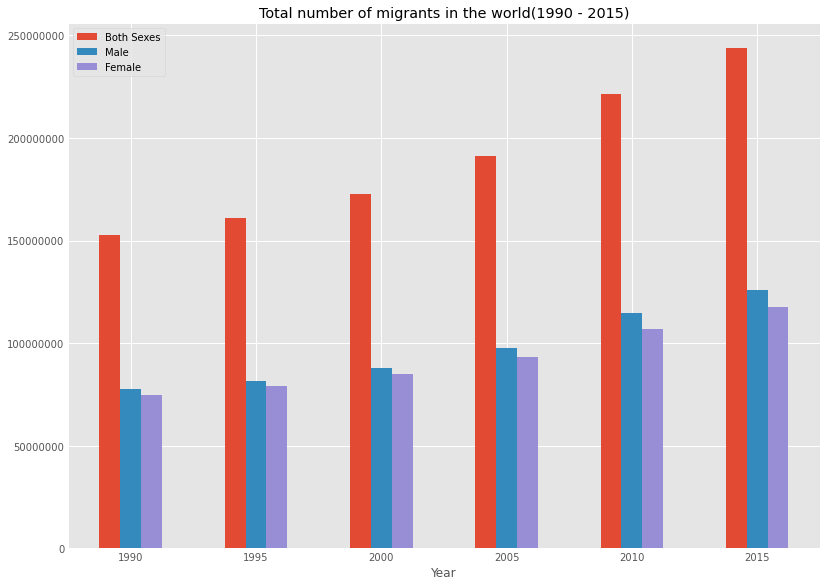

In [985]:
table1_World = tidy_t1.loc['WORLD'].astype(float)
table1_World[('Migrant Stock Mid-Year', 'Both Sexes')]

table1_World.plot(kind='bar', figsize=(12,9), 
              title='Total number of migrants in the world(1990 - 2015)').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y' )
plt.legend(['Both Sexes','Male','Female'])

In [799]:
# top 10 region with largest Mid-Year Migrant 1990
table1_bs = tidy_t1[('Migrant Stock Mid-Year', 'Both Sexes')].unstack()

largest_table1_bs = table1_bs['1990'].astype(float)
largest_table1_bs.nlargest(30)

Region
WORLD                                                         152563212.0
Developed regions                                              82378628.0
Developing regions                                             70184584.0
Less developed regions excluding least developed countries     59105261.0
Europe                                                         49219200.0
Asia                                                           48142261.0
Northern America                                               27610542.0
United States of America                                       23251026.0
Eastern Europe                                                 21995312.0
Southern Asia                                                  19436343.0
Western Europe                                                 16237829.0
Africa                                                         15690623.0
Western Asia                                                   15239274.0
Sub-Saharan Africa             

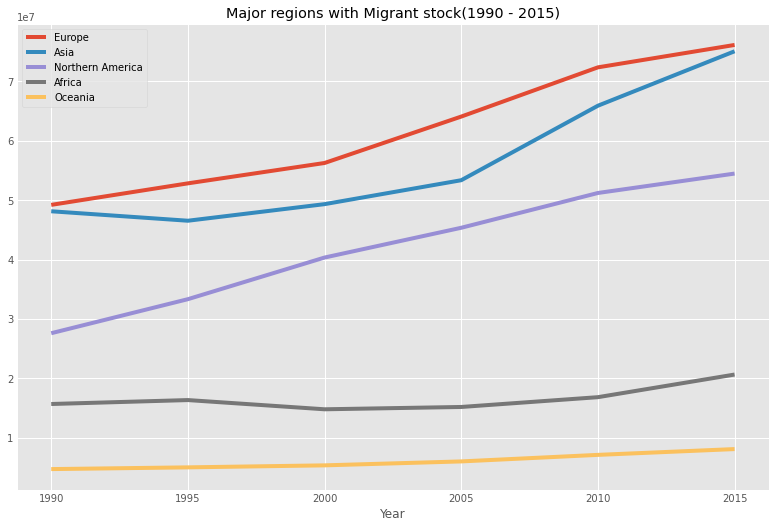

In [987]:
# Graph by label
table1_Europe = tidy_t1.loc['Europe'].astype(float)
table1_Europe= table1_Europe[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Asia = tidy_t1.loc['Asia'].astype(float)
table1_Asia= table1_Asia[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_NA = tidy_t1.loc['Northern America'].astype(float)
table1_NA= table1_NA[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Africa = tidy_t1.loc['Africa'].astype(float)
table1_Africa= table1_Africa[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Oceania = tidy_t1.loc['Oceania'].astype(float)
table1_Oceania= table1_Oceania[('Migrant Stock Mid-Year', 'Both Sexes')]

ax = table1_Europe.plot(figsize=(12, 8),title='Major regions with Migrant stock(1990 - 2015)') 

table1_Asia.plot(ax=ax)
table1_NA.plot(ax=ax)
table1_Africa.plot(ax=ax)

table1_Oceania.plot(ax=ax)


plt.legend(['Europe', 'Asia', 'Northern America', 'Africa','Oceania'])


In [801]:
# 1990 top countries by Migrants-stock
regions = ['WORLD','Developed regions','Developing regions','Less developed regions excluding least developed countries',
          'Europe','Asia','Northern America','Eastern Europe','Southern Asia','Western Europe','Africa','Western Asia',
          'Sub-Saharan Africa','Least developed countries','Latin America and the Caribbean','Northern Europe','Central Asia',
          'Eastern Africa', 'Southern Europe','South-Eastern Asia','Oceania', 'Eastern Asia','Western Africa']
tb1_BothSexes_melt2 = tb1_BothSexes_melt
tb1_BothSexes_melt3 = tb1_BothSexes_melt
tb1_BothSexes_melt = tb1_BothSexes_melt.query('Region not in @regions')
tb1_BothSexes_melt_1990 = tb1_BothSexes_melt.loc[(tb1_BothSexes_melt['Gender'] == 'Both Sexes')]
tb1_BothSexes_melt_1990 = tb1_BothSexes_melt.loc[(tb1_BothSexes_melt['Year'] == '1990')]

tb1_BothSexes_melt_1990['Migrant Stock Mid-Year'] = tb1_BothSexes_melt_1990['Migrant Stock Mid-Year'].astype(float)

tb1_BothSexes_melt_1990 = tb1_BothSexes_melt_1990.nlargest(10,'Migrant Stock Mid-Year')
tb1_BothSexes_melt_1990



Region      Gender  Year  Migrant Stock Mid-Year
236   United States of America  Both Sexes  1990              23251026.0
135         Russian Federation  Both Sexes  1990              11524948.0
101                      India  Both Sexes  1990               7493204.0
137                    Ukraine  Both Sexes  1990               6892920.0
105                   Pakistan  Both Sexes  1990               6208204.0
173                    Germany  Both Sexes  1990               5936181.0
172                     France  Both Sexes  1990               5897267.0
120               Saudi Arabia  Both Sexes  1990               4998445.0
238  Australia and New Zealand  Both Sexes  1990               4473260.0
233                     Canada  Both Sexes  1990               4333318.0

Gender
Both Sexes    AxesSubplot(0.08,0.07;0.87x0.81)
dtype: object

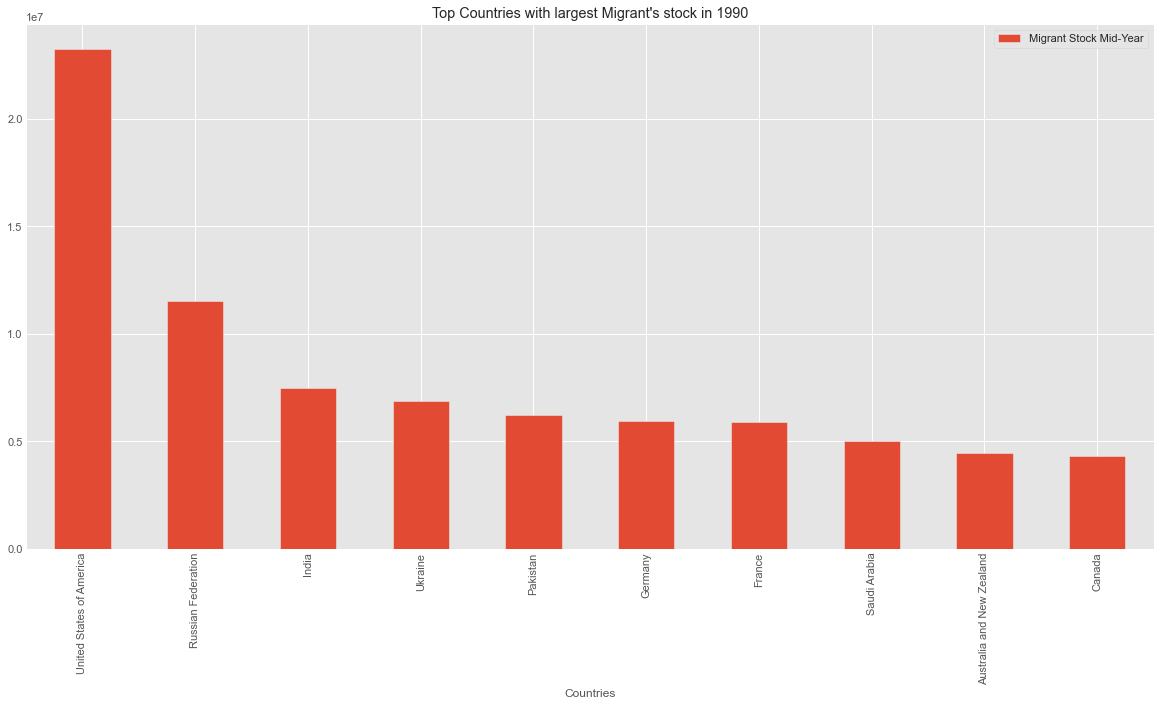

In [831]:
#Top Countries with largest Migrant\'s stock in 1990
tb1_BothSexes_melt_1990.set_index('Region').groupby("Gender").plot.bar(xlabel='Countries', figsize=(18,9), 
        title='Top Countries with largest Migrant\'s stock in 1990', label='_nolegend_')

In [802]:
# 2015 top countries by Migrants-stock
tb1_BothSexes_melt2 = tb1_BothSexes_melt2.query('Region not in @regions')

tb1_BothSexes_melt_2015 = tb1_BothSexes_melt2.loc[(tb1_BothSexes_melt2['Gender'] == 'Both Sexes')]
tb1_BothSexes_melt_2015 = tb1_BothSexes_melt2.loc[(tb1_BothSexes_melt2['Year'] == '2015')]
tb1_BothSexes_melt_2015['Migrant Stock Mid-Year'] = tb1_BothSexes_melt_2015['Migrant Stock Mid-Year'].astype(float)

tb1_BothSexes_melt_2015 = tb1_BothSexes_melt_2015.nlargest(10,'Migrant Stock Mid-Year')
tb1_BothSexes_melt_2015



Region      Gender  Year  \
1561                           United States of America  Both Sexes  2015   
1498                                            Germany  Both Sexes  2015   
1460                                 Russian Federation  Both Sexes  2015   
1445                                       Saudi Arabia  Both Sexes  2015   
1476  United Kingdom of Great Britain and Northern I...  Both Sexes  2015   
1449                               United Arab Emirates  Both Sexes  2015   
1558                                             Canada  Both Sexes  2015   
1563                          Australia and New Zealand  Both Sexes  2015   
1497                                             France  Both Sexes  2015   
1564                                          Australia  Both Sexes  2015   

      Migrant Stock Mid-Year  
1561              46627102.0  
1498              12005690.0  
1460              11643276.0  
1445              10185945.0  
1476               8543120.0  
1449               8095126.0  
1558               7835502.0  
1563               7803399.0  
1497               7784418.0  
1564               6763663.0

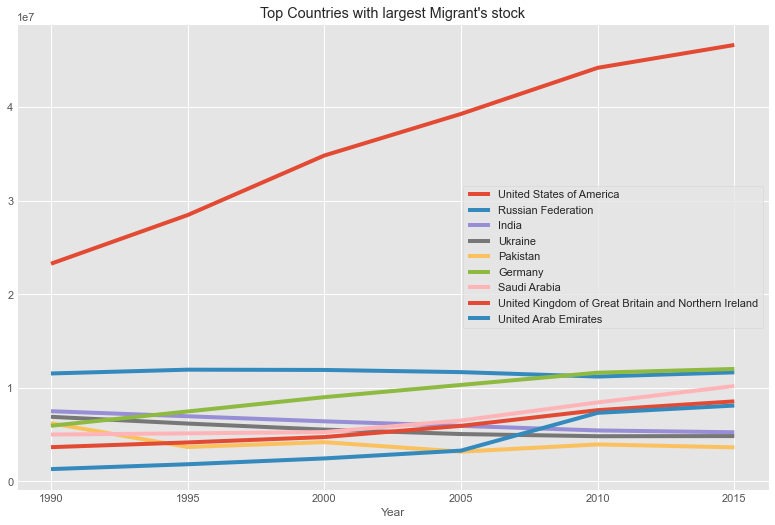

In [803]:
# Graph by label only countries
table1_USA = tidy_t1.loc['United States of America'].astype(float)
table1_USA= table1_USA[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_RF = tidy_t1.loc['Russian Federation'].astype(float)
table1_RF= table1_RF[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_ind = tidy_t1.loc['India'].astype(float)
table1_ind= table1_ind[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Ukraine = tidy_t1.loc['Ukraine'].astype(float)
table1_Ukraine= table1_Ukraine[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Pakistan = tidy_t1.loc['Pakistan'].astype(float)
table1_Pakistan= table1_Pakistan[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Germany = tidy_t1.loc['Germany'].astype(float)
table1_Germany= table1_Germany[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_saudi = tidy_t1.loc['Saudi Arabia'].astype(float)
table1_saudi= table1_saudi[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_uki = tidy_t1.loc['United Kingdom of Great Britain and Northern Ireland'].astype(float)
table1_uki= table1_uki[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_uae = tidy_t1.loc['United Arab Emirates'].astype(float)
table1_uae= table1_uae[('Migrant Stock Mid-Year', 'Both Sexes')]
ax = table1_USA.plot(figsize=(12, 8),title='Top Countries with largest Migrant\'s stock') 

table1_RF.plot(ax=ax)
table1_ind.plot(ax=ax)
table1_Ukraine.plot(ax=ax)
table1_Pakistan.plot(ax=ax)
table1_Germany.plot(ax=ax)
table1_saudi.plot(ax=ax)
table1_uki.plot(ax=ax)
table1_uae.plot(ax=ax)


plt.legend(['United States of America', 'Russian Federation', 'India', 'Ukraine','Pakistan','Germany',
           'Saudi Arabia','United Kingdom of Great Britain and Northern Ireland','United Arab Emirates'])


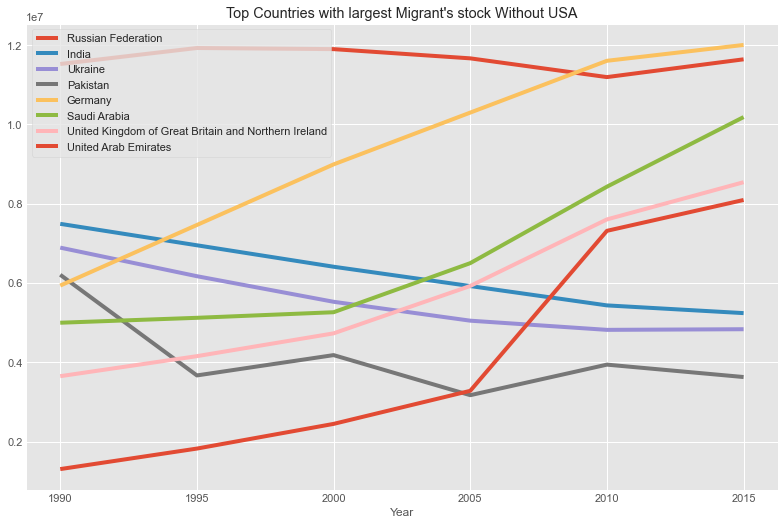

In [804]:
# Graph by label only countries without USA
table1_RF = tidy_t1.loc['Russian Federation'].astype(float)
table1_RF= table1_RF[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_ind = tidy_t1.loc['India'].astype(float)
table1_ind= table1_ind[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Ukraine = tidy_t1.loc['Ukraine'].astype(float)
table1_Ukraine= table1_Ukraine[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Pakistan = tidy_t1.loc['Pakistan'].astype(float)
table1_Pakistan= table1_Pakistan[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_Germany = tidy_t1.loc['Germany'].astype(float)
table1_Germany= table1_Germany[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_saudi = tidy_t1.loc['Saudi Arabia'].astype(float)
table1_saudi= table1_saudi[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_uki = tidy_t1.loc['United Kingdom of Great Britain and Northern Ireland'].astype(float)
table1_uki= table1_uki[('Migrant Stock Mid-Year', 'Both Sexes')]
table1_uae = tidy_t1.loc['United Arab Emirates'].astype(float)
table1_uae= table1_uae[('Migrant Stock Mid-Year', 'Both Sexes')]
ax = table1_RF.plot(figsize=(12, 8), title='Top Countries with largest Migrant\'s stock Without USA') 

table1_ind.plot(ax=ax)
table1_Ukraine.plot(ax=ax)
table1_Pakistan.plot(ax=ax)
table1_Germany.plot(ax=ax)
table1_saudi.plot(ax=ax)
table1_uki.plot(ax=ax)
table1_uae.plot(ax=ax)


plt.legend(['Russian Federation', 'India', 'Ukraine','Pakistan','Germany',
           'Saudi Arabia','United Kingdom of Great Britain and Northern Ireland','United Arab Emirates'])


In [806]:
tb1_BothSexes_melt3 = tb1_BothSexes_melt
#tb1_BothSexes_melt3 = tb1_BothSexes_melt3.loc[(tb1_BothSexes_melt['Gender'] == 'Both Sexes')]
tb1_BothSexes_melt3['Migrant Stock Mid-Year'] = tb1_BothSexes_melt3['Migrant Stock Mid-Year'].astype(float)
tb1_BothSexes_melt3
tb1_BothSexes_melt3['Year'] = tb1_BothSexes_melt3['Year'].astype(float)

df = tb1_BothSexes_melt3.loc[(tb1_BothSexes_melt['Region'] == 'India')]

df

Region      Gender    Year  Migrant Stock Mid-Year
101   India  Both Sexes  1990.0               7493204.0
366   India  Both Sexes  1995.0               6952238.0
631   India  Both Sexes  2000.0               6411272.0
896   India  Both Sexes  2005.0               5923642.0
1161  India  Both Sexes  2010.0               5436012.0
1426  India  Both Sexes  2015.0               5240960.0

<AxesSubplot:xlabel='None-Gender', ylabel='Year'>

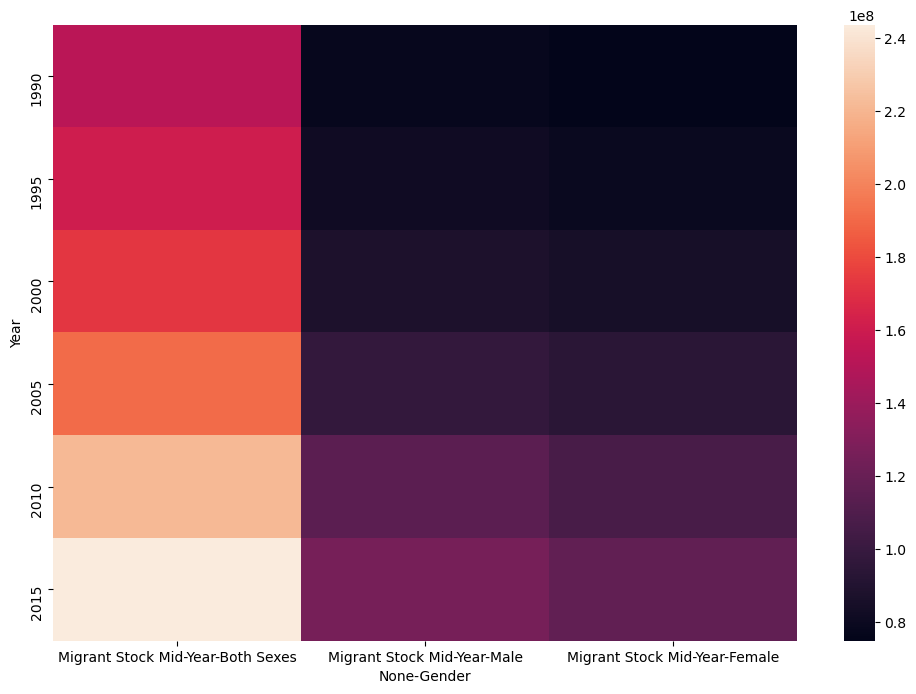

In [997]:

plt.figure(figsize=(12,8))

sns.heatmap(table1_World)



<AxesSubplot:xlabel='None-Gender', ylabel='None-Gender'>

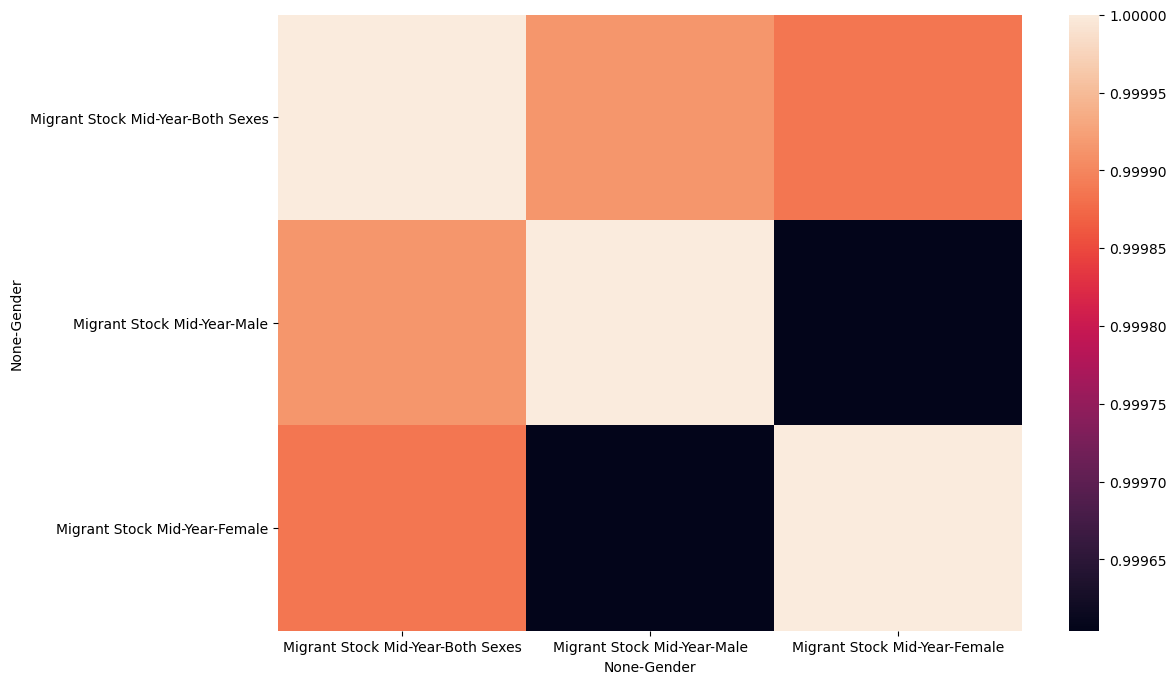

In [998]:

plt.figure(figsize=(12,8))

sns.heatmap(table1_World.corr())



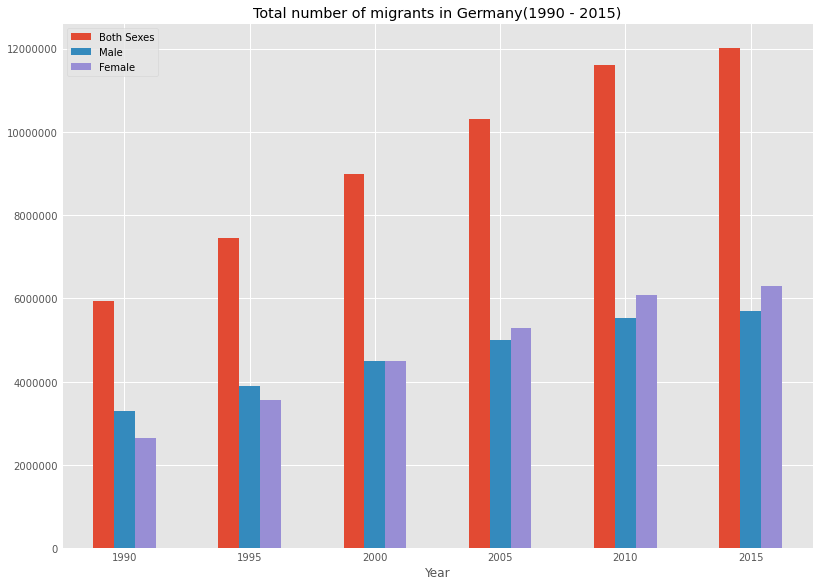

In [988]:
table1_Ger = tidy_t1.loc['Germany'].astype(float)

table1_Ger.plot(kind='bar', figsize=(12,9), 
              title='Total number of migrants in Germany(1990 - 2015)').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y' )

plt.legend(['Both Sexes','Male','Female'])


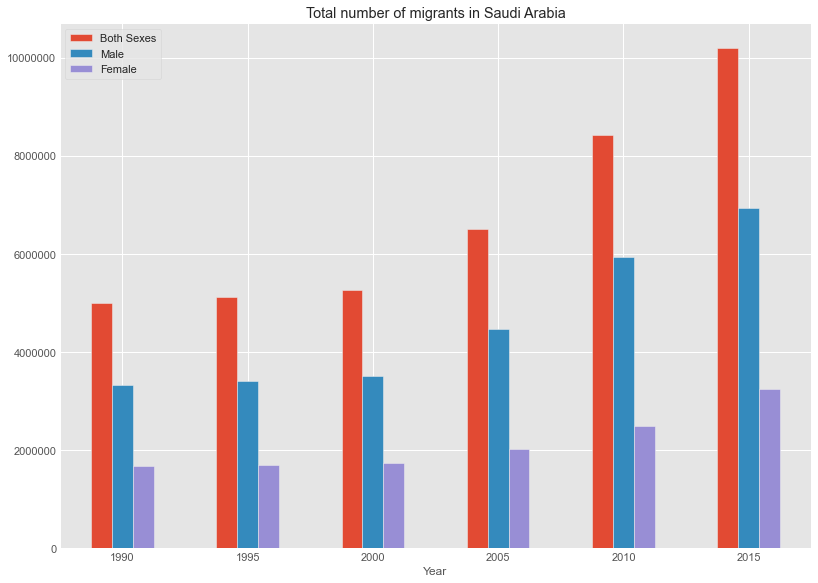

In [829]:
table1_Saudi = tidy_t1.loc['Saudi Arabia'].astype(float)

table1_Saudi.plot(kind='bar', figsize=(12,9), 
              title='Total number of migrants in Saudi Arabia').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y' )
plt.legend(['Both Sexes','Male','Female'])

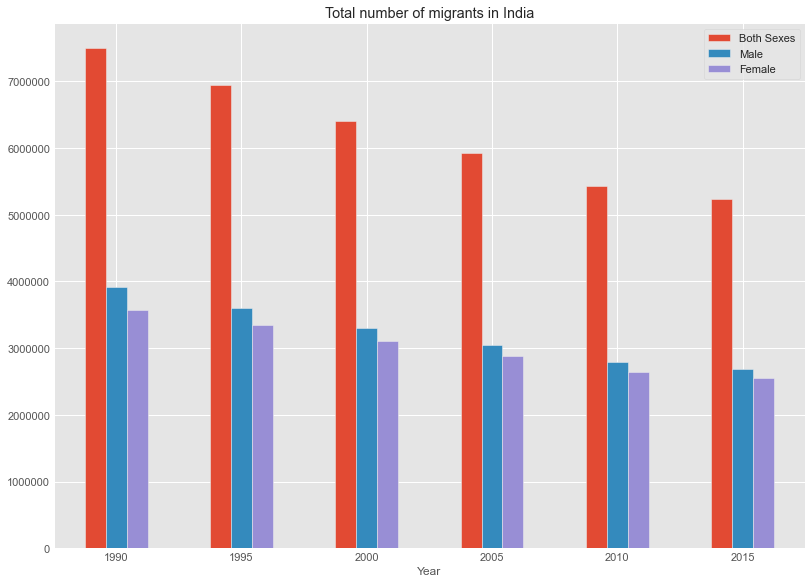

In [830]:
table1_ind = tidy_t1.loc['India'].astype(float)

table1_ind.plot(kind='bar', figsize=(12,9), 
              title='Total number of migrants in India').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y' )
plt.legend(['Both Sexes','Male','Female'])

In [900]:
table3_All= tidy_t3[('Migrant Stock Percentage', 'Both Sexes')]
table3_All = table3_All.unstack()

Index(['1990', '1995', '2000', '2005', '2010', '2015'], dtype='object', name='Year')

<AxesSubplot:xlabel='Year'>

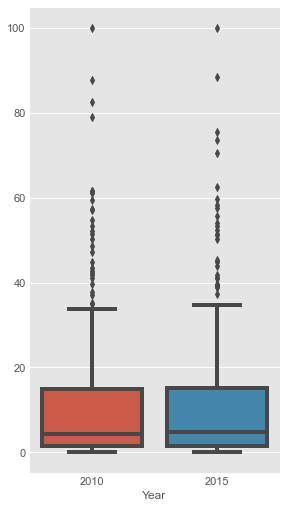

In [915]:
plt.figure(figsize=(4,8))
sns.boxplot(data=table3_All)


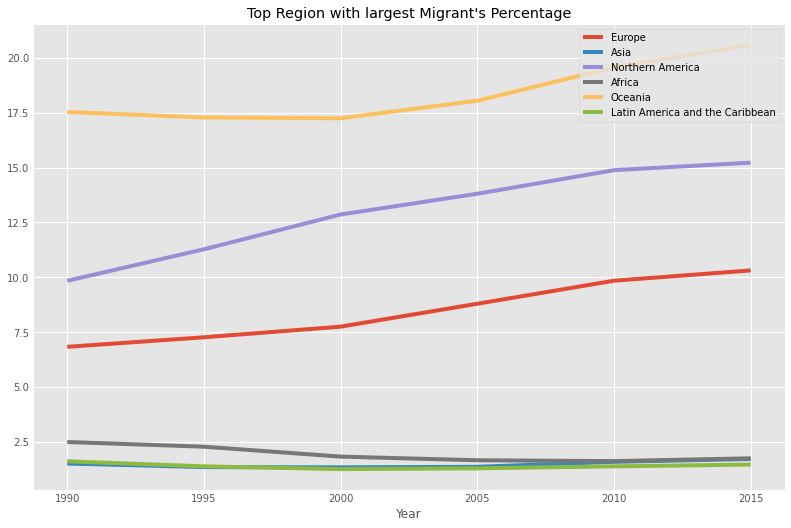

In [989]:
# Graph by label Migrant Stock Percentage
table3_Europe = tidy_t3.loc['Europe'].astype(float)
table3_Europe= table3_Europe[('Migrant Stock Percentage', 'Both Sexes')]
table3_Asia = tidy_t3.loc['Asia'].astype(float)
table3_Asia= table3_Asia[('Migrant Stock Percentage', 'Both Sexes')]
table3_NA = tidy_t3.loc['Northern America'].astype(float)
table3_NA= table3_NA[('Migrant Stock Percentage', 'Both Sexes')]
table3_Africa = tidy_t3.loc['Africa'].astype(float)
table3_Africa= table3_Africa[('Migrant Stock Percentage', 'Both Sexes')]
table3_Oceania = tidy_t3.loc['Oceania'].astype(float)
table3_Oceania= table3_Oceania[('Migrant Stock Percentage', 'Both Sexes')]
table3_sa = tidy_t3.loc['Latin America and the Caribbean'].astype(float)
table3_sa= table3_sa[('Migrant Stock Percentage', 'Both Sexes')]
ax = table3_Europe.plot(figsize=(12, 8),title='Top Region with largest Migrant\'s Percentage') 

table3_Asia.plot(ax=ax)
table3_NA.plot(ax=ax)
table3_Africa.plot(ax=ax)
table3_Oceania.plot(ax=ax)
table3_sa.plot(ax=ax)

plt.legend(['Europe', 'Asia', 'Northern America', 'Africa','Oceania','Latin America and the Caribbean'])


In [957]:
# Extract top 10 region with highest Migrant Stock Percentage 1990
table3_bs = tidy_t3[('Migrant Stock Percentage', 'Both Sexes')].unstack()
largest_table3_bs = pd.to_numeric(table3_bs['1990'], errors='coerce')
largest_table3_bs = largest_table3_bs.nlargest(10)
largest_table3_bs

Region
Holy See                                      100.000000
United Arab Emirates                           72.128308
Andorra                                        71.369081
Monaco                                         69.158910
Qatar                                          65.008878
Northern Mariana Islands                       60.477122
China, Macao Special Administrative Region     56.999458
French Guiana                                  54.941183
Guam                                           53.459481
Kuwait                                         52.184491
Name: 1990, dtype: float64

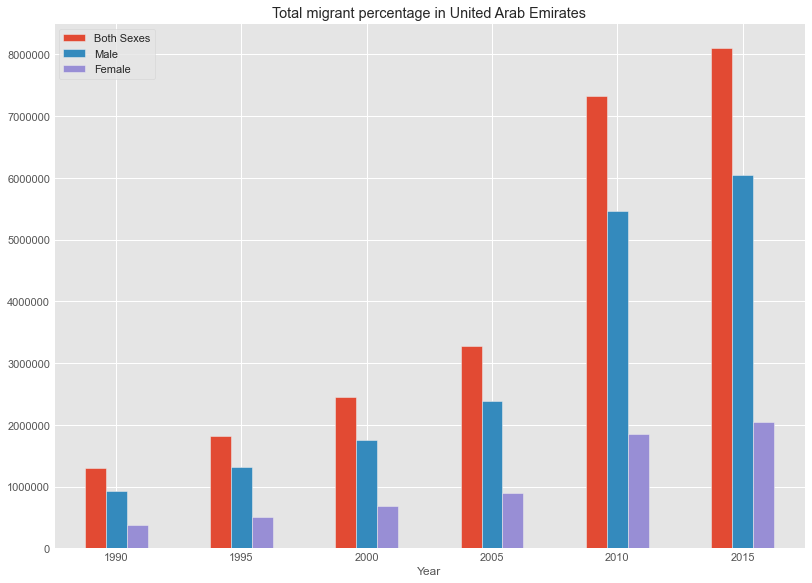

In [963]:
table3_UAE = tidy_t1.loc['United Arab Emirates'].astype(float)

table3_UAE.plot(kind='bar', figsize=(12,9), 
              title='Total migrant percentage in United Arab Emirates').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y' )
plt.legend(['Both Sexes','Male','Female'])

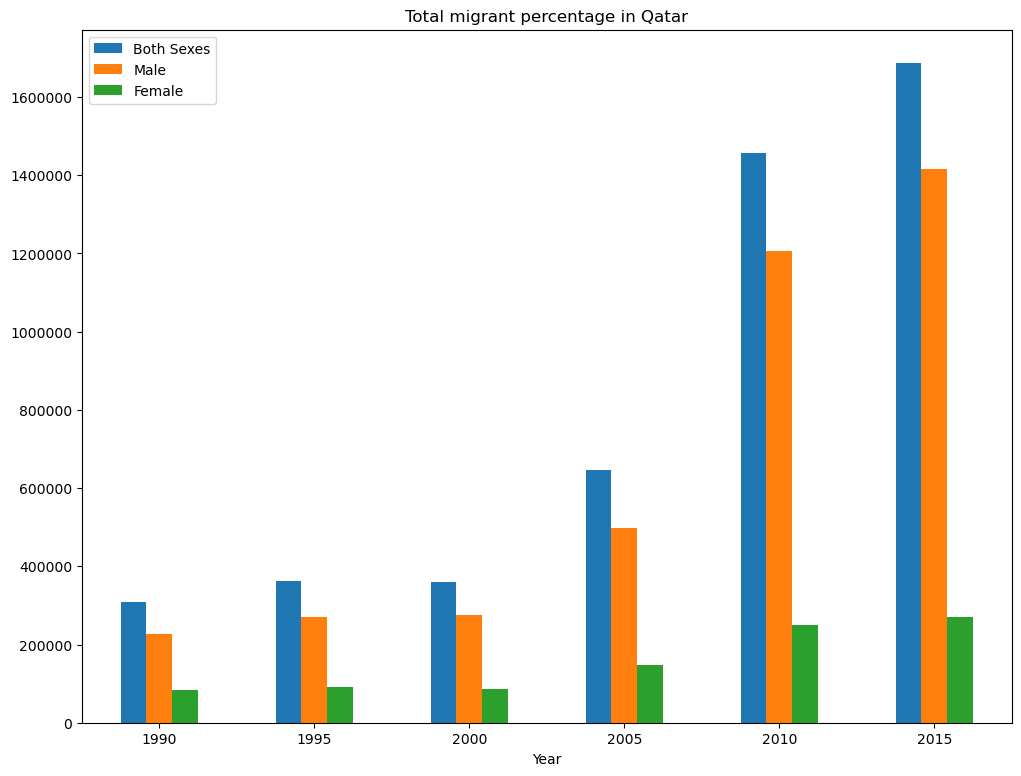

In [991]:
table3_Qatar = tidy_t1.loc['Qatar'].astype(float)
plt.style.use('default')
table3_Qatar.plot(kind='bar', figsize=(12,9), 
              title='Total migrant percentage in  ').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y' )
plt.legend(['Both Sexes','Male','Female'])

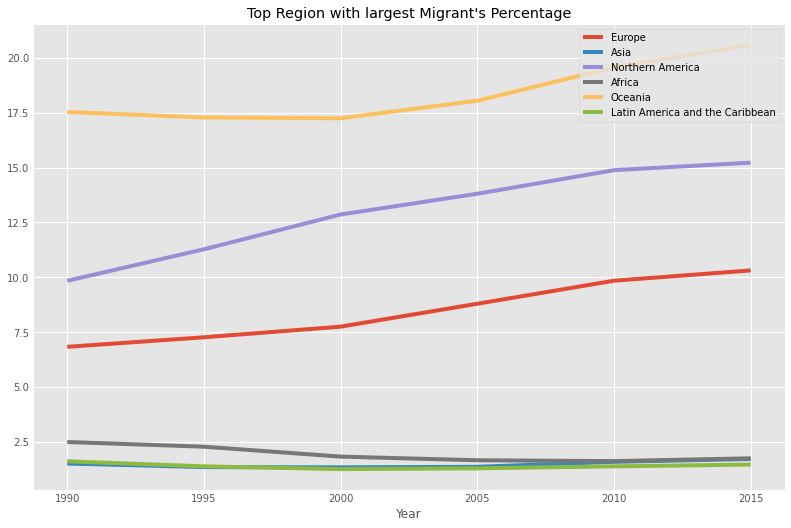

In [990]:
# Highest Female Percentage
table3_Europe = tidy_t3.loc['Europe'].astype(float)
table3_Europe= table3_Europe[('Migrant Stock Percentage', 'Both Sexes')]
table3_Asia = tidy_t3.loc['Asia'].astype(float)
table3_Asia= table3_Asia[('Migrant Stock Percentage', 'Both Sexes')]
table3_NA = tidy_t3.loc['Northern America'].astype(float)
table3_NA= table3_NA[('Migrant Stock Percentage', 'Both Sexes')]
table3_Africa = tidy_t3.loc['Africa'].astype(float)
table3_Africa= table3_Africa[('Migrant Stock Percentage', 'Both Sexes')]
table3_Oceania = tidy_t3.loc['Oceania'].astype(float)
table3_Oceania= table3_Oceania[('Migrant Stock Percentage', 'Both Sexes')]
table3_sa = tidy_t3.loc['Latin America and the Caribbean'].astype(float)
table3_sa= table3_sa[('Migrant Stock Percentage', 'Both Sexes')]
ax = table3_Europe.plot(figsize=(12, 8),title='Top Region with largest Migrant\'s Percentage') 

table3_Asia.plot(ax=ax)
table3_NA.plot(ax=ax)
table3_Africa.plot(ax=ax)
table3_Oceania.plot(ax=ax)
table3_sa.plot(ax=ax)

plt.legend(['Europe', 'Asia', 'Northern America', 'Africa','Oceania','Latin America and the Caribbean'])



In [964]:
# Extract top 10 region with highest Migrant Stock Percentage 1990
table4_female = tidy_t4[('Female Percentage', 'Female')].unstack()
table4_female = pd.to_numeric(table4_female['1990'], errors='coerce')
table4_female = table4_female.nlargest(10)
table4_female

Region
Nepal                                        70.703810
Armenia                                      58.934500
The former Yugoslav Republic of Macedonia    58.313889
Kyrgyzstan                                   58.205247
Barbados                                     58.104396
Bulgaria                                     57.940493
Romania                                      57.591754
Guatemala                                    57.384289
Poland                                       57.245221
Ukraine                                      57.150192
Name: 1990, dtype: float64

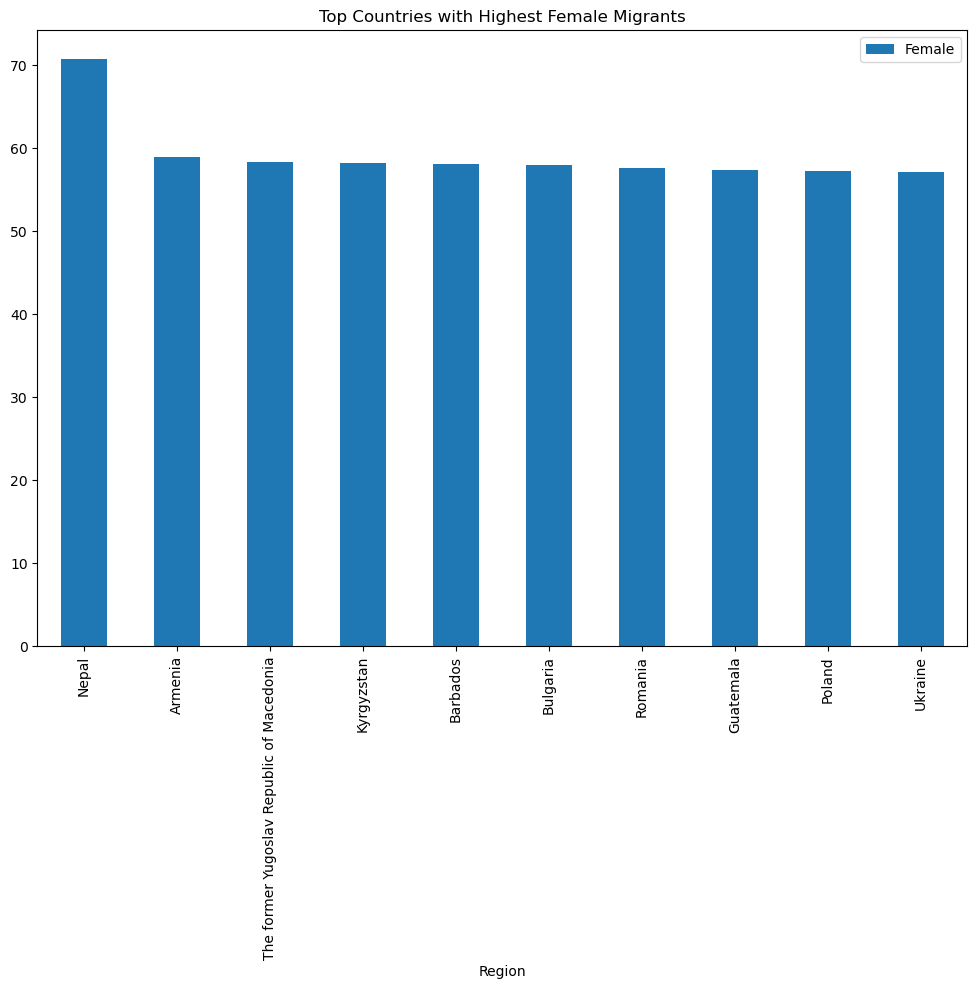

In [982]:

table4_female.plot(kind='bar',figsize=(12,8),
              title='Top Countries with Highest Female Migrants')
plt.legend(['Female'])